 # Preprocessing

 I'm using the Gensim - Topic Modeling for Humans library to both get the Coherence of the models based of the parameters, and to build the model.

 

In [1]:

import pickle #To store lists

from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import matplotlib.pyplot as plt
###
# from google.colab import drive
import spacy
import gensim
import pandas as pd
spacy.cli.download("en_core_web_md")
nlp = spacy.load('en_core_web_md')

# from google.colab import drive
# drive.mount('/content/gdrive')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [2]:
FROM_DRIVE = False

def round_up(n, decimals=0):
    multiplier = 10 ** decimals
    return math.ceil(n * multiplier) / multiplier

if FROM_DRIVE:
  
  sheet_id = "12V2euXZRC9uSeRyWUZNSV8A2LBfGSbSUpfTo6hdkMBU"
  sheet_name = "spacenews"
  url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
  DataSet = pd.read_csv(url)
else:
  DataSet = pd.read_csv('spacenews_tittle_and_content - spacenews.csv')

DataSet


title  \
0      Astrocast buying Hiber to boost funding and ex...   
1      Sierra Space to partner with Spirit AeroSystem...   
2      Rocket to launch China’s next space station mo...   
3      Against Quad? China launches satellite-based E...   
4      House committee questions proposed delay in NA...   
...                                                  ...   
17469  Kendall lays out Pentagon thinking on future s...   
17470  A larger share of NOAA’s declining space budge...   
17471  Think Tank Turns Its Attention To Mars As 2016...   
17472  House Bill Leaves Last Three JPSS Satellites i...   
17473  Championing a Climate Change for Commercial We...   

                                                 content  
0      TAMPA, Fla. — Cash-strapped smallsat operator ...  
1      WASHINGTON — Sierra Space announced May 31 a s...  
2      HELSINKI — A Long March 5B rocket has arrived ...  
3      SEOUL, South Korea — In what appears to be a t...  
4      WASHINGTON — Members of the House Science Comm...  
...                                                  ...  
17469  \nFrank Kendall, the Pentagon’s top acquisitio...  
17470  Updated Feb. 10 at 10:18 p.m. Eastern The U.S....  
17471  WASHINGTON — As NASA develops a long-term stra...  
17472  WASHINGTON — A spending bill the House passed ...  
17473  U.S. Rep. Jim Bridenstine (R-Okla.) is a growi...  

[17474 rows x 2 columns]

In [3]:
DataSet = DataSet.dropna()
unspliteddocuments = DataSet['content'].values.tolist()
documents = []
for i in unspliteddocuments:
    documents.append(i.split())
# documents
avrage = 0
maximum = [0,""]
minimum = [0,""]
maximumCount = len(documents[0])
minimumCount = len(documents[0])

for i,content in enumerate(documents):
    avrage = avrage + len(content)
    if len(content) > maximumCount:
        maximumCount = len(content)
        maximum[0] = i
        maximum[1] = content
    if len(content) < minimumCount and len(content) > 10:
        minimumCount = len(content)
        minimum[0] = i
        minimum[1]= content

avrage = avrage / len(documents)


print(f'Number of documents in my collection: {len(documents)}')
print()
print(f'The avrage number of words in my collection {avrage}')
print()
print(f'Longest document of my collection has {maximumCount} words: ' + str(maximum[1][:20]) + '... continues')
print()
print(f'Shortest document of my collection has {minimumCount} words: ' + str(minimum))


Number of documents in my collection: 17303

The avrage number of words in my collection 632.8473675085245

Longest document of my collection has 6558 words: ['The', 'drama', 'and', 'uncertainty', 'surrounding', 'the', 'U.S.', 'government', 'launch', 'enterprise', 'and', 'its', 'incumbent', 'provider,', 'United', 'Launch', 'Alliance,', 'in', '2015', 'stood']... continues

Shortest document of my collection has 11 words: [13020, ['RESOURCES', 'NASA’s', 'Strategic', 'Direction', 'and', 'the', 'Need', 'for', 'a', 'National', 'Consensus']]


In [43]:
new_docs = []
for i,doc in enumerate(unspliteddocuments):

    clean = " ".join(word for word in gensim.utils.simple_preprocess(doc, min_len = 4))
    # removing stop words, digits, the words [will, say, said, going],
    tdoc=nlp(clean)
    stops_and_digits_removed  = " ".join(token.lemma_ for token in tdoc if not token.is_stop and not token.is_digit and not token.text == 'will' and not token.text == 'say' and not token.text == 'said' and not token.text == 'going' and token.lemma_ != '-PRON-' and token.pos_ in ['NOUN','PROPN'])
   
    new_docs.append(stops_and_digits_removed)

In [44]:
with open("test", "wb") as fp:   #Pickling
    pickle.dump(new_docs, fp)


In [4]:
with open("test", "rb") as fp:   # Unpickling
    new_docs_from_storage = pickle.load(fp)
new_docs = new_docs_from_storage

In [5]:
unspliteddocuments[51]

'WASHINGTON — NASA is seeking informal public input on a set of 50 objectives for its exploration efforts that agency leadership says will go into a broader effort to guide its activities for the next two decades. NASA released May 17  a set of high-level objectives  for its lunar and Mars exploration campaign. The agency also announced  it was soliciting input on those objectives through its website  until May 31. The 50 objectives, each just a sentence long, fall in four categories: transportation and habitation, lunar and Martian infrastructure, operations and science. Examples range from “develop cislunar systems that crew can routinely operate to lunar orbit and lunar surface for extended durations” to “develop and demonstrate entry, descent, and landing (EDL) systems capable of delivering crew and large cargo to the Martian surface.” NASA is eschewing a traditional request for information (RFI) approach for this effort, but said in its announcement that it follow up on the feedba

In [6]:
new_docs[0]

'cash operator astrocast plan dutch connectivity solution provider hiber plan constellation year failure satellite switzerland astrocast deal spectrum americas constellation internet thing device astrocast plan issue share fund acquisition hiber astrocast stock market year startup term funding needs astrocast euro listing share euronext growth paris junior stock market france startup fund constellation satellite test spacecraft coverage astrocast satellite earth orbit unit cubesats astrocast model unit cubesat astrocast company august share euronext growth oslo norway operator february region americas astrocast spokesperson fatima vigil perez service hour latency astrocast report franc expansion plan coverage satellite revisit rate company franc loss operator startup spacex swarm share space market satellite device network astrocast service customer market agriculture maritime utility customer mining logistic agriculture market satellite device solution customer track asset location co

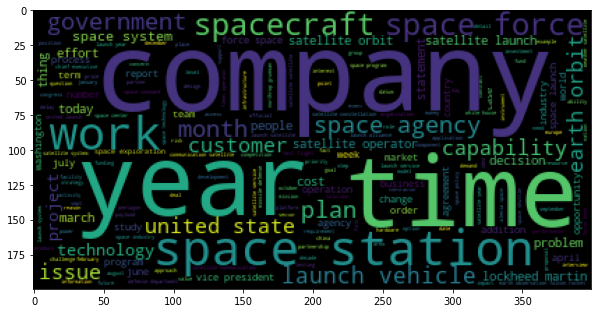

In [7]:
import matplotlib.pyplot as plt
import wordcloud as wc
colls= ''
tokens = []
for i, thing in enumerate(new_docs):
    tokens.append(thing.split(" "))

for d in tokens:
    collect = " ".join([w for w in d])
    colls = colls + " "+collect
colls

myCloud = wc.WordCloud().generate(colls)
plt.figure(figsize=(10,10))
plt.imshow(myCloud)

In [7]:
dtoken=[gensim.utils.simple_preprocess(d, deacc= True, min_len=4) for d in new_docs] 
print('Building bigrams')
from gensim.models.phrases import Phrases, Phraser
phrases = Phrases(dtoken, min_count = 2,threshold=9)
bigram=Phraser(phrases)
bdocs=[bigram[d] for d in dtoken]

Building bigrams


In [50]:
[print(d) for d in bdocs]
for d in bdocs:
  for w in d:
    if '_' in w:
      print(w)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



earth_orbit
james_webb
french_guiana
readiness_date
asia_pacific
head_sales
asia_pacific
noise_vibration
northrop_grumman
facility_southern
french_guiana
panama_canal
french_guiana
daniel_neuenschwander
component_supplier
ground_station
laser_communication
earth_orbit
barry_matsumori
laser_communication
point_point
point_multipoint
laser_communication
data_rate
laser_communication
micro_david
ground_station
national_harbor
supply_chain
consumer_electronic
supply_chain
panel_discussion
jean_marc
nasr_executive
vice_president
frank_demauro
vice_president
northrop_grumman
halo_module
lunar_gateway
supply_chain
ryan_reid
supply_chain
supply_chain
supply_chain
nasr_airbus
supply_chain
chris_johnson
vice_president
maxar_technology
agility_flexibility
vice_president
alenia_space
chief_executive
manufacturer_nanoavionic
national_harbor
internet_thing
alexandre_tisserant
peter_beck
chief_executive
phone_interview
bulk_purchase
altitude_kilometer
electron_kick
kick_stage
earth_orbit
covid_restri

artemis_program
human_moon
artemis_program
ellen_lord
lord_undersecretary
acquisition_sustainment
pain_point
firm_quilty
quilty_analytic
virgin_orbit
quilty_analytic
aperture_radar
earth_orbit
internet_thing
business_model
quilty_analytic
internet_thing
softbank_oneweb
revenue_profit
alex_clavel
tech_conglomerate
whayne_oneweb
chapter_protection
whayne_oneweb
coronaviru_crisis
janice_vice
spacenew_webinar
claude_rousseau
softbank_oneweb
oneweb_bankruptcy
matt_connell
internet_access
user_terminal
array_antenna
user_terminal
user_terminal
samer_halawi
value_proposition
airplane_ship
band_frequency
spectrum_license
alexandre_vallet
department_bureau
band_downlink
spectrum_license
charlie_ergen
fleet_operators
echostar_dish
oneweb_bankruptcy
elon_musk
iridium_globalstar
orbcomm_teledesic
equity_debt
chapter_bankruptcy
oneweb_bankruptcy
signal_converter
oneweb_bankruptcy
oneweb_bankruptcy
panel_antenna
longtime_critic
issue_spacenews
laurel_jersey
norway_netherlands
earth_orbit
royal_nethe

launch_alliance
panel_discussion
american_astronautical
society_wernher
braun_symposium
john_elbon
operating_officer
tory_bruno
president_chief
origin_glenn
clay_mowry
vice_president
sale_marketing
business_luncheon
northrop_grumman
john_steinmeyer
northrop_grumman
braun_symposium
fire_test
industry_source
raptor_engine
falcon_rocket
caleb_henry
panel_antenna
antenna_maker
dave_helfgott
flat_panel
startup_phasor
mountain_view
dish_antenna
vice_president
garden_variety
aperture_terminal
piece_metal
panel_antenna
dish_antenna
panel_antenna
dish_antenna
panel_antenna
university_waterloo
israel_gilat
panel_antennas
radio_frequency
panel_antenna
panel_antenna
couple_dollar
price_point
consumer_terminal
vice_president
palo_alto
panel_antenna
dish_antenna
earth_orbit
dish_dish
geostationary_orbit
panel_antenna
dish_antenna
earth_orbit
kind_stuff
bull_consultant
signal_converter
north_carolina
vice_president
panel_antenna
isotropic_system
darmstadt_germany
alcan_system
panel_antenna
consumer_g

streaming_service
order_book
seatback_screen
budget_proposal
york_times
aerojet_rocketdyne
huntsville_alabama
southern_california
center_excellence
stock_exchange
percent_trading
harris_caprock
global_eagle
paul_rainey
global_eagle
dave_davis
rainey_global
funding_round
filing_security
exchange_commission
kymeta_panel
degree_east
laser_communication
asteroid_mining
resource_asteroids
spaceresources_initiative
minister_etienne
united_states
press_conference
saturn_moon
water_surface
jupiter_moon
subsurface_ocean
aerojet_rocketdyne
aerojet_rocketdyne
cost_saving
eileen_drake
president_chief
aerojet_rocketdyne
rancho_cordova
aerojet_rocketdyne
huntsville_alabama
facility_southern
center_excellence
parent_company
aerojet_rocketdyne
segundo_california
aerojet_rocketdyne
aerojet_rocketdyne
launch_alliance
symposium_colorado
test_firing
stage_engine
west_texas
executive_tory
aerojet_rocketdyne
engine_aerojet
security_exchange
harris_caprock
paul_rainey
connectivity_provider
global_eagle
chief

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [8]:
dictionary=Dictionary(bdocs)
print(dictionary)
dictionary.filter_extremes(keep_n = 5000, no_above= 0.8, no_below = len(bdocs)*.01) # no_below 1%
print(dictionary)
corpus_bof=[dictionary.doc2bow(d) for d in bdocs]

Dictionary<56594 unique tokens: ['access', 'acquisition', 'agreement', 'agriculture', 'agriculture_maritime']...>
Dictionary<1503 unique tokens: ['access', 'acquisition', 'agreement', 'america', 'asset']...>


# Applying

## Bag of words

In [8]:
K=[12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]
cv=[]
vocab = list(dictionary.values())
print('# of docs: %5d # of words: %6d'%(dictionary.num_docs, len(vocab)))
for k in K:
    lda = LdaModel(corpus = corpus_bof,num_topics= k, random_state= 27644437, id2word = dictionary, alpha = "asymmetric", eta= "symmetric",per_word_topics = True,passes = 100)
    lda_cv = CoherenceModel(model=lda, texts= bdocs, dictionary=dictionary, coherence='c_v')
    cv_cohe=lda_cv.get_coherence()
    print('K: %2d coherence: %.3f'%(k, cv_cohe))
    cv.append(cv_cohe)

# of docs: 17303 # of words:   1503
K: 12 coherence: 0.481
K: 13 coherence: 0.475
K: 14 coherence: 0.491
K: 15 coherence: 0.478
K: 16 coherence: 0.471
K: 17 coherence: 0.487
K: 18 coherence: 0.485
K: 19 coherence: 0.487
K: 20 coherence: 0.488
K: 21 coherence: 0.484
K: 22 coherence: 0.486
K: 23 coherence: 0.477
K: 24 coherence: 0.485
K: 25 coherence: 0.481
K: 26 coherence: 0.492
K: 27 coherence: 0.486
K: 28 coherence: 0.480
K: 29 coherence: 0.485
K: 30 coherence: 0.493
K: 31 coherence: 0.488
K: 32 coherence: 0.489


In [ ]:
# of docs:   200 # of words:   2506
K:  5 coherence: 0.366
K: 10 coherence: 0.382
K: 15 coherence: 0.383
K: 20 coherence: 0.390
K: 25 coherence: 0.401
K: 30 coherence: 0.398
K: 35 coherence: 0.413
K: 40 coherence: 0.415
K: 45 coherence: 0.407
K: 50 coherence: 0.408
K: 55 coherence: 0.397
K: 60 coherence: 0.378
K: 65 coherence: 0.411
K: 70 coherence: 0.391
K: 80 coherence: 0.415
K: 85 coherence: 0.408
K: 90 coherence: 0.417
K: 95 coherence: 0.386
        
# of docs:    10 # of words:    634
K:  5 coherence: 0.474
K: 10 coherence: 0.576
K: 15 coherence: 0.608
K: 20 coherence: 0.568
K: 25 coherence: 0.603
K: 30 coherence: 0.532
K: 35 coherence: 0.576
K: 40 coherence: 0.607
K: 45 coherence: 0.574
K: 50 coherence: 0.535
K: 55 coherence: 0.566
K: 60 coherence: 0.556
K: 65 coherence: 0.565
K: 70 coherence: 0.564
K: 75 coherence: 0.577
K: 80 coherence: 0.584
K: 85 coherence: 0.577
K: 90 coherence: 0.549
K: 95 coherence: 0.570
K: 100 coherence: 0.566
        
# of docs: 17303 # of words:   1503
K:  7 coherence: 0.441
K:  8 coherence: 0.461
K:  9 coherence: 0.478
K: 10 coherence: 0.486
K: 11 coherence: 0.486
        
# of docs: 17303 # of words:   1503
K: 12 coherence: 0.481
K: 13 coherence: 0.475
K: 14 coherence: 0.491
K: 15 coherence: 0.478
K: 16 coherence: 0.471
K: 17 coherence: 0.487
K: 18 coherence: 0.485
K: 19 coherence: 0.487
K: 20 coherence: 0.488
K: 21 coherence: 0.484
K: 22 coherence: 0.486
K: 23 coherence: 0.477
K: 24 coherence: 0.485
K: 25 coherence: 0.481
K: 26 coherence: 0.492
K: 27 coherence: 0.486
K: 28 coherence: 0.480
K: 29 coherence: 0.485
K: 30 coherence: 0.493
K: 31 coherence: 0.488
K: 32 coherence: 0.489

IndentationError: ignored

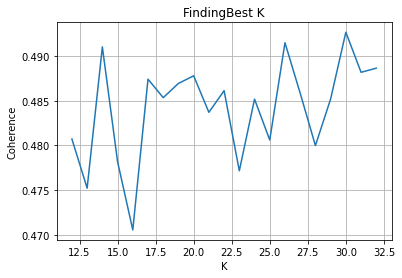

In [9]:
## With 200 docs: 
# K=[]
# cv=[]
fig, ax = plt.subplots()
ax.plot(K, cv
)

ax.set(xlabel='K', ylabel='Coherence',
       title='FindingBest K')
ax.grid()

fig.savefig("test.png")
plt.show()

In [9]:
# Best: K: 10 alfa: asymmetric beta:  symmetric passes: 100
K = 20
lda = LdaModel(corpus = corpus_bof,num_topics= K, random_state= 27644437, id2word = dictionary, alpha = "asymmetric", eta= "symmetric",per_word_topics = True,passes = 100)

In [10]:
lda_cv = CoherenceModel(model=lda, texts= bdocs, dictionary=dictionary, coherence='c_v')
cv_cohe=lda_cv.get_coherence()
print('K: %2d coherence: %.3f'%(K, cv_cohe))

K: 20 coherence: 0.488


In [11]:
lda.print_topics()

# lda.get_document_topic

[(0,
  '0.185*"satellite" + 0.076*"orbit" + 0.047*"payload" + 0.046*"spacecraft" + 0.033*"mission" + 0.030*"launch" + 0.021*"technology" + 0.019*"year" + 0.018*"cubesat" + 0.017*"kilogram"'),
 (1,
  '0.115*"launch" + 0.067*"rocket" + 0.063*"engine" + 0.050*"vehicle" + 0.024*"cost" + 0.022*"united" + 0.022*"force" + 0.021*"year" + 0.021*"launch_alliance" + 0.021*"mission"'),
 (2,
  '0.116*"contract" + 0.064*"company" + 0.030*"boeing" + 0.025*"award" + 0.024*"program" + 0.020*"competition" + 0.017*"work" + 0.015*"system" + 0.014*"lockheed_martin" + 0.014*"agency"'),
 (3,
  '0.091*"system" + 0.076*"satellite" + 0.037*"program" + 0.033*"force" + 0.021*"defense" + 0.020*"capability" + 0.019*"missile" + 0.018*"communication" + 0.016*"ground" + 0.016*"year"'),
 (4,
  '0.159*"force" + 0.035*"service" + 0.030*"command" + 0.023*"pentagon" + 0.019*"defense" + 0.016*"operation" + 0.015*"acquisition" + 0.014*"security" + 0.011*"capability" + 0.010*"congress"'),
 (5,
  '0.120*"satellite" + 0.049*"se

In [12]:

topics = lda.print_topics()


new_topics = [[] for i in range(K)]

for i in range(K):
    oldtopic = topics[i][1]
    tag = False
    new_word = ""
    for j in oldtopic:
        if j == "\"" and tag == False:
            tag = True
        elif j == "\"" and tag == True:
            tag = False
            new_topics[i].append(new_word)
            new_word = ""
        if tag == True and j != "\"":
            new_word += j        


print()  
print()
for i in range(K):
    print("Topic", i, end=' => ')
    print(new_topics[i], end =' ')
    print()



Topic 0 => ['satellite', 'orbit', 'payload', 'spacecraft', 'mission', 'launch', 'technology', 'year', 'cubesat', 'kilogram'] 
Topic 1 => ['launch', 'rocket', 'engine', 'vehicle', 'cost', 'united', 'force', 'year', 'launch_alliance', 'mission'] 
Topic 2 => ['contract', 'company', 'boeing', 'award', 'program', 'competition', 'work', 'system', 'lockheed_martin', 'agency'] 
Topic 3 => ['system', 'satellite', 'program', 'force', 'defense', 'capability', 'missile', 'communication', 'ground', 'year'] 
Topic 4 => ['force', 'service', 'command', 'pentagon', 'defense', 'operation', 'acquisition', 'security', 'capability', 'congress'] 
Topic 5 => ['satellite', 'service', 'constellation', 'network', 'communication', 'iridium', 'oneweb', 'operator', 'band', 'broadband'] 
Topic 6 => ['satellite', 'year', 'service', 'capacity', 'percent', 'band', 'market', 'customer', 'government', 'operator'] 
Topic 7 => ['government', 'agency', 'europe', 'euro', 'program', 'satellite', 'year', 'ariane', 'arianesp

In [43]:
newinfo = lda.get_document_topics(corpus_bof[7], minimum_probability=0)
newinfo

[(0, 0.061289217),
 (1, 0.00082132424),
 (2, 0.09046966),
 (3, 0.17630734),
 (4, 0.20681442),
 (5, 0.00047433833),
 (6, 0.00042904296),
 (7, 0.00039164422),
 (8, 0.00036024267),
 (9, 0.21042816),
 (10, 0.012291621),
 (11, 0.00029039275),
 (12, 0.0002727634),
 (13, 0.23806581),
 (14, 0.00024323097),
 (15, 0.00023073972),
 (16, 0.00021946883),
 (17, 0.00020924772),
 (18, 0.0001999363),
 (19, 0.00019141826)]

In [44]:
newinfo = lda.get_document_topics(corpus_bof[7], minimum_probability=0)
mostprobtopic = 0
mostprobtopiclabel = 0
for j in newinfo:
    if j[1] > mostprobtopic:
        mostprobtopic = j[1]
        mostprobtopiclabel = j[0]
print(mostprobtopiclabel, mostprobtopic)
                

13 0.23806402


In [66]:
dictionarie = {}
for i in range(K):
    dictionarie[i] = {"Number of docs": 0}
for i in range (len(corpus_bof)):
    print(i, lda.get_document_topics(corpus_bof[i], minimum_probability=0.3))
    info = lda.get_document_topics(corpus_bof[i], minimum_probability=0.3)
    if len(info) == 0:
        newinfo = lda.get_document_topics(corpus_bof[i], minimum_probability=0)
        mostprobtopic = 0
        mostprobtopiclabel = 0
        for j in newinfo:
            if j[1] > mostprobtopic:
                mostprobtopic = j[1]
                mostprobtopiclabel = j[0]
        dictionarie[mostprobtopiclabel]["Number of docs"] +=1
    else:
        for j in info:
            dictionarie[j[0]]["Number of docs"] +=1

0 [(5, 0.46616232), (19, 0.34273055)]
1 [(18, 0.36956492)]
2 [(13, 0.37529537), (18, 0.31170076)]
3 [(10, 0.5321688)]
4 [(8, 0.31869817), (9, 0.59088224)]
5 [(8, 0.54703444), (16, 0.32171673)]
6 [(1, 0.45274386), (2, 0.30516675)]
7 []
8 [(13, 0.40016058), (18, 0.48986122)]
9 [(18, 0.5768166)]
10 []
11 [(5, 0.67268515)]
12 [(14, 0.33638647)]
13 []
14 [(5, 0.6088996)]
15 [(0, 0.50964123)]
16 [(19, 0.69184905)]
17 [(11, 0.67995286)]
18 [(0, 0.5047322)]
19 [(11, 0.39139932)]
20 [(18, 0.59776646)]
21 [(5, 0.713736)]
22 [(13, 0.3886804)]
23 [(14, 0.43383944)]
24 [(15, 0.6530618)]
25 [(1, 0.49471244)]
26 [(11, 0.5127514)]
27 []
28 [(2, 0.30685496)]
29 [(19, 0.32432768)]
30 [(3, 0.43302706)]
31 [(5, 0.76919323)]
32 [(14, 0.42560083)]
33 []
34 [(10, 0.5759573)]
35 [(8, 0.43305972)]
36 []
37 [(18, 0.8510433)]
38 []
39 [(14, 0.30323598)]
40 [(10, 0.4753006)]
41 [(9, 0.5806828)]
42 [(4, 0.326434), (14, 0.34797093)]
43 [(1, 0.38373098), (18, 0.4374978)]
44 [(13, 0.40445992), (18, 0.39221278)]
45 [(

395 [(18, 0.44147027)]
396 [(0, 0.3174512), (13, 0.37038705)]
397 [(8, 0.92546177)]
398 [(5, 0.50972044)]
399 [(3, 0.32138446)]
400 [(19, 0.37956735)]
401 [(11, 0.32530087)]
402 [(14, 0.41048986), (19, 0.32300848)]
403 [(3, 0.5892824)]
404 [(0, 0.3205728), (13, 0.48629788)]
405 [(5, 0.5651839), (19, 0.32469606)]
406 []
407 [(13, 0.390037), (18, 0.52093655)]
408 [(18, 0.6881466)]
409 [(0, 0.3046042)]
410 [(3, 0.5590445)]
411 [(13, 0.31309307)]
412 []
413 [(13, 0.58177084)]
414 [(9, 0.32008064)]
415 [(10, 0.39160636)]
416 [(10, 0.3960707)]
417 [(8, 0.5147741)]
418 [(10, 0.35708684), (17, 0.4370402)]
419 [(5, 0.35248625), (13, 0.33728713)]
420 [(18, 0.43270722)]
421 [(14, 0.49860248)]
422 [(17, 0.44876745)]
423 [(13, 0.33658668)]
424 [(5, 0.5866638)]
425 [(15, 0.3068097)]
426 [(19, 0.3409977)]
427 [(9, 0.42335433)]
428 [(15, 0.36121166)]
429 [(19, 0.32580552)]
430 [(9, 0.36385265)]
431 []
432 [(14, 0.4677159)]
433 [(9, 0.6093486)]
434 [(19, 0.6210806)]
435 [(3, 0.6029182)]
436 []
437 [(5,

930 [(0, 0.38084766)]
931 [(6, 0.77325815)]
932 [(14, 0.4281242)]
933 [(13, 0.72632885)]
934 [(17, 0.391831)]
935 [(13, 0.4879172)]
936 []
937 [(13, 0.34664652)]
938 [(14, 0.3860939)]
939 []
940 [(10, 0.5400974)]
941 []
942 [(19, 0.38450855)]
943 [(15, 0.41723633)]
944 [(17, 0.48704445)]
945 [(15, 0.3431198)]
946 [(0, 0.5346172)]
947 []
948 [(15, 0.3895476)]
949 []
950 [(0, 0.46809414)]
951 []
952 [(14, 0.34315577)]
953 [(18, 0.34289625)]
954 [(13, 0.35045612), (19, 0.3561771)]
955 [(17, 0.4183731)]
956 [(14, 0.65283257)]
957 [(11, 0.30755264)]
958 []
959 []
960 [(5, 0.5170744)]
961 [(10, 0.33677605)]
962 [(5, 0.540198)]
963 [(3, 0.7587762)]
964 [(17, 0.34991255)]
965 [(15, 0.6115278)]
966 [(11, 0.6268912)]
967 [(8, 0.5457151), (9, 0.4189488)]
968 [(5, 0.5273569), (13, 0.36271712)]
969 [(12, 0.32550818), (16, 0.5219738)]
970 [(19, 0.47637922)]
971 [(15, 0.346541)]
972 []
973 [(14, 0.33136323)]
974 [(19, 0.36731717)]
975 [(5, 0.42008373)]
976 [(0, 0.3393156)]
977 [(18, 0.78287566)]
978 

1295 [(19, 0.31964642)]
1296 []
1297 [(13, 0.47232637), (19, 0.3875898)]
1298 [(5, 0.3931197)]
1299 [(3, 0.3246945)]
1300 []
1301 [(13, 0.43335095)]
1302 [(13, 0.45270908)]
1303 [(5, 0.4167932), (11, 0.3482533)]
1304 []
1305 [(13, 0.38545376)]
1306 [(5, 0.5467994), (11, 0.38253954)]
1307 [(5, 0.57969534)]
1308 [(5, 0.5150547)]
1309 []
1310 []
1311 [(0, 0.4306299)]
1312 []
1313 []
1314 []
1315 [(0, 0.5813599)]
1316 [(4, 0.35381708)]
1317 [(3, 0.42734563)]
1318 [(5, 0.39336032)]
1319 [(19, 0.60915583)]
1320 [(15, 0.5928892)]
1321 [(19, 0.47291437)]
1322 [(19, 0.35327578)]
1323 [(5, 0.3895741)]
1324 [(5, 0.46027836), (19, 0.38364485)]
1325 [(19, 0.5320259)]
1326 [(14, 0.5776974)]
1327 [(9, 0.64062285)]
1328 [(8, 0.410394)]
1329 [(13, 0.33917704), (16, 0.38731903)]
1330 [(2, 0.33200034)]
1331 [(13, 0.6714087)]
1332 [(16, 0.7768276)]
1333 [(0, 0.3191614), (19, 0.4548655)]
1334 [(19, 0.77280873)]
1335 [(3, 0.6987363)]
1336 [(5, 0.34539273)]
1337 [(13, 0.43693084)]
1338 [(13, 0.50297904)]
133

1691 [(15, 0.53259814)]
1692 [(11, 0.33851075), (19, 0.30674207)]
1693 [(14, 0.4093419)]
1694 [(0, 0.39121482)]
1695 [(5, 0.3246925)]
1696 [(13, 0.5512148)]
1697 [(18, 0.51436365)]
1698 [(18, 0.5689444)]
1699 [(4, 0.49635965)]
1700 [(19, 0.33637765)]
1701 [(7, 0.3338792)]
1702 [(4, 0.7514872)]
1703 [(0, 0.3048827), (19, 0.35930136)]
1704 [(10, 0.37819624)]
1705 []
1706 [(10, 0.48691586)]
1707 [(8, 0.5585139), (9, 0.36641872)]
1708 []
1709 [(9, 0.42274353)]
1710 [(1, 0.39833423)]
1711 [(6, 0.3800068)]
1712 [(13, 0.38162842)]
1713 [(0, 0.3458445)]
1714 [(14, 0.42220122), (19, 0.432107)]
1715 [(0, 0.31290868)]
1716 [(18, 0.72522056)]
1717 [(3, 0.3095995)]
1718 [(13, 0.39774704)]
1719 [(16, 0.82466626)]
1720 []
1721 [(19, 0.7154022)]
1722 [(19, 0.35219777)]
1723 [(8, 0.7483111)]
1724 [(8, 0.5476454), (9, 0.35192502)]
1725 [(9, 0.50442237)]
1726 [(4, 0.32632855)]
1727 []
1728 [(19, 0.40768975)]
1729 [(14, 0.55699193)]
1730 [(15, 0.37019965), (19, 0.40867814)]
1731 [(18, 0.36007565)]
1732 [(

2078 []
2079 []
2080 [(1, 0.360143)]
2081 [(6, 0.56892383)]
2082 [(3, 0.60134333)]
2083 [(19, 0.4877037)]
2084 [(5, 0.47007447)]
2085 [(19, 0.6949833)]
2086 [(13, 0.33340126)]
2087 [(19, 0.5278332)]
2088 []
2089 [(5, 0.3691352)]
2090 [(19, 0.32833478)]
2091 [(5, 0.35664564), (13, 0.4456522)]
2092 [(8, 0.43742797), (16, 0.3794084)]
2093 [(18, 0.45514336)]
2094 []
2095 [(19, 0.48687816)]
2096 []
2097 [(0, 0.33053383), (19, 0.32377446)]
2098 [(5, 0.358645)]
2099 [(19, 0.5981071)]
2100 [(19, 0.7370787)]
2101 [(19, 0.42060965)]
2102 [(0, 0.32625565), (13, 0.386916)]
2103 [(4, 0.61147326)]
2104 [(15, 0.36660635), (19, 0.31806412)]
2105 [(11, 0.35390165)]
2106 [(6, 0.68217546)]
2107 [(0, 0.4491598)]
2108 [(14, 0.31873327)]
2109 []
2110 [(13, 0.4259426)]
2111 [(15, 0.40247384)]
2112 [(4, 0.63530505)]
2113 [(5, 0.3788608)]
2114 [(19, 0.61904716)]
2115 [(9, 0.4151351)]
2116 []
2117 [(8, 0.5145642)]
2118 [(9, 0.48212343)]
2119 [(12, 0.40577388), (19, 0.32802227)]
2120 [(18, 0.33635595)]
2121 [(4,

2485 [(7, 0.46368188)]
2486 []
2487 [(13, 0.4437219)]
2488 [(5, 0.5929395)]
2489 [(19, 0.68409306)]
2490 []
2491 [(17, 0.40339813), (18, 0.35163873)]
2492 [(3, 0.37836862)]
2493 [(7, 0.3613082)]
2494 [(8, 0.42753446), (17, 0.3832097)]
2495 [(17, 0.33518812)]
2496 []
2497 [(14, 0.64866686)]
2498 [(14, 0.55756724)]
2499 [(8, 0.55228734), (9, 0.33217886)]
2500 [(14, 0.6306999), (15, 0.3548161)]
2501 [(13, 0.5495654), (16, 0.30868858)]
2502 [(8, 0.5248041)]
2503 [(4, 0.61698544)]
2504 [(5, 0.38698098)]
2505 [(13, 0.589341)]
2506 [(5, 0.5611896)]
2507 [(18, 0.9410779)]
2508 [(0, 0.38531992)]
2509 [(4, 0.6535837)]
2510 [(8, 0.30621585), (14, 0.4296303)]
2511 [(11, 0.37155235)]
2512 []
2513 [(2, 0.3555778)]
2514 [(13, 0.45682028)]
2515 [(13, 0.4454587)]
2516 [(16, 0.91385156)]
2517 []
2518 [(8, 0.34839034), (14, 0.41586265)]
2519 [(4, 0.39842704), (9, 0.443941)]
2520 []
2521 []
2522 [(18, 0.82763916)]
2523 [(13, 0.35491225), (18, 0.36661473)]
2524 [(13, 0.6104571)]
2525 []
2526 [(3, 0.3136469

2873 [(11, 0.30680153)]
2874 [(15, 0.38026127)]
2875 [(18, 0.35308394)]
2876 [(3, 0.59286547)]
2877 [(17, 0.41782227)]
2878 [(5, 0.53095305)]
2879 [(19, 0.3947962)]
2880 [(9, 0.37935787), (17, 0.4810936)]
2881 [(3, 0.661362)]
2882 [(4, 0.6664503)]
2883 [(5, 0.37291908), (13, 0.46715546)]
2884 [(11, 0.31636727), (14, 0.3979256)]
2885 [(14, 0.39960238)]
2886 []
2887 [(5, 0.30938855)]
2888 [(10, 0.43607157)]
2889 []
2890 []
2891 [(17, 0.30203888)]
2892 []
2893 [(17, 0.30249247)]
2894 []
2895 []
2896 []
2897 [(6, 0.7521631)]
2898 [(5, 0.38779512)]
2899 [(17, 0.34069657)]
2900 []
2901 [(15, 0.34577397), (19, 0.43571264)]
2902 []
2903 [(4, 0.635482)]
2904 [(3, 0.5157078)]
2905 [(18, 0.3948376)]
2906 [(3, 0.5945177)]
2907 [(3, 0.8896857)]
2908 [(17, 0.3967047)]
2909 [(4, 0.5053273), (9, 0.43189922)]
2910 [(13, 0.6518104)]
2911 [(0, 0.35828692), (3, 0.32504347)]
2912 [(6, 0.44091815)]
2913 [(12, 0.4391047)]
2914 []
2915 [(8, 0.46700615)]
2916 []
2917 [(0, 0.5275148)]
2918 [(8, 0.7153313)]
2919

3236 [(13, 0.5522171)]
3237 [(6, 0.63847184)]
3238 [(0, 0.4163872)]
3239 [(8, 0.44050875), (14, 0.3426969)]
3240 [(14, 0.33425912)]
3241 [(1, 0.632363)]
3242 [(2, 0.6749155)]
3243 [(9, 0.3081724)]
3244 []
3245 [(15, 0.5012731)]
3246 [(7, 0.4590746)]
3247 [(5, 0.3039178)]
3248 [(8, 0.31307638), (14, 0.35723153)]
3249 []
3250 [(13, 0.3752912)]
3251 [(13, 0.3322354)]
3252 [(6, 0.77520937)]
3253 [(4, 0.82390475)]
3254 [(9, 0.73883903)]
3255 [(0, 0.42277542), (13, 0.33445883)]
3256 [(18, 0.3345354)]
3257 [(0, 0.33990535)]
3258 [(14, 0.40692744)]
3259 [(15, 0.65503275)]
3260 [(13, 0.38880607)]
3261 [(17, 0.43534055)]
3262 [(3, 0.6070896)]
3263 [(14, 0.51330113)]
3264 [(7, 0.3530345)]
3265 []
3266 [(8, 0.4857405), (14, 0.31055903)]
3267 []
3268 [(16, 0.8103208)]
3269 [(14, 0.3270983), (19, 0.6373932)]
3270 [(18, 0.43120962)]
3271 [(14, 0.37513584)]
3272 [(18, 0.8621043)]
3273 [(8, 0.3492309), (9, 0.38051164)]
3274 [(4, 0.5497826)]
3275 [(13, 0.42973164)]
3276 [(8, 0.36212742)]
3277 [(1, 0.351

3620 [(15, 0.35348743)]
3621 [(13, 0.3757109)]
3622 [(13, 0.6011765)]
3623 [(15, 0.33602485)]
3624 []
3625 []
3626 [(13, 0.4566629)]
3627 [(5, 0.58416474)]
3628 [(8, 0.3289978)]
3629 [(6, 0.39926282)]
3630 [(18, 0.7741342)]
3631 [(15, 0.32170063)]
3632 [(5, 0.41058034)]
3633 [(17, 0.40409157)]
3634 [(13, 0.5439213)]
3635 [(4, 0.58505154)]
3636 []
3637 [(2, 0.37872908)]
3638 [(18, 0.71039975)]
3639 [(13, 0.48617026)]
3640 [(14, 0.37690598)]
3641 [(19, 0.5810213)]
3642 [(15, 0.3283283)]
3643 [(15, 0.49818566)]
3644 [(18, 0.58215386)]
3645 [(4, 0.645943)]
3646 [(5, 0.32005563), (19, 0.42720336)]
3647 [(18, 0.33071342)]
3648 [(8, 0.57809776)]
3649 [(17, 0.61655986)]
3650 [(13, 0.42896864)]
3651 [(13, 0.34121305), (16, 0.5425965)]
3652 [(4, 0.874688)]
3653 []
3654 [(13, 0.3600098), (16, 0.3854247)]
3655 [(8, 0.49778518)]
3656 []
3657 [(5, 0.36347058)]
3658 []
3659 []
3660 []
3661 []
3662 [(18, 0.73652273)]
3663 [(4, 0.69468236)]
3664 [(3, 0.5886973)]
3665 [(4, 0.9587441)]
3666 []
3667 [(8, 

4008 [(6, 0.5431406)]
4009 [(19, 0.5207258)]
4010 [(19, 0.5574532)]
4011 [(7, 0.43123055)]
4012 [(0, 0.37889826)]
4013 [(14, 0.4859871)]
4014 [(3, 0.30316305)]
4015 [(8, 0.34548378)]
4016 [(0, 0.3305301)]
4017 [(15, 0.47704965)]
4018 [(4, 0.90768147)]
4019 [(4, 0.769377)]
4020 [(5, 0.31877384)]
4021 [(0, 0.3792664), (13, 0.3132324)]
4022 [(18, 0.4354925)]
4023 [(8, 0.349703), (14, 0.35992873)]
4024 [(14, 0.47919735)]
4025 [(14, 0.47124183)]
4026 [(13, 0.652872)]
4027 [(16, 0.94079995)]
4028 [(13, 0.3694174), (18, 0.31459406)]
4029 [(1, 0.6450955)]
4030 [(17, 0.41930193)]
4031 [(6, 0.599965)]
4032 [(2, 0.48262018)]
4033 []
4034 [(2, 0.36290967)]
4035 [(9, 0.33359885)]
4036 []
4037 [(13, 0.32282835), (18, 0.30912328)]
4038 [(13, 0.51144373)]
4039 [(4, 0.40180078), (15, 0.37872323)]
4040 []
4041 [(2, 0.32954544), (17, 0.39370665)]
4042 [(3, 0.34254906), (4, 0.50185114)]
4043 [(5, 0.31911272)]
4044 [(19, 0.34514973)]
4045 [(0, 0.30413964)]
4046 [(0, 0.3167681), (8, 0.58007866)]
4047 [(18, 

4390 [(12, 0.3420645), (17, 0.39976355)]
4391 [(15, 0.30357224), (16, 0.4282413)]
4392 [(3, 0.46707988)]
4393 [(4, 0.7335157)]
4394 [(14, 0.60117835)]
4395 [(5, 0.3155904), (14, 0.33827448)]
4396 [(13, 0.6083097)]
4397 [(16, 0.4287422), (19, 0.30604228)]
4398 [(14, 0.48414728), (19, 0.328659)]
4399 [(15, 0.47242203)]
4400 [(18, 0.31635424)]
4401 [(18, 0.79663515)]
4402 []
4403 [(6, 0.30291846), (13, 0.4404847)]
4404 [(13, 0.5172636)]
4405 [(5, 0.38735795), (19, 0.34425056)]
4406 []
4407 [(2, 0.42512286)]
4408 [(0, 0.4612397), (8, 0.36685356)]
4409 [(14, 0.5291713)]
4410 [(0, 0.3884741)]
4411 [(15, 0.5792292)]
4412 [(0, 0.3099506), (19, 0.33786356)]
4413 [(11, 0.38659033)]
4414 [(5, 0.33301544), (14, 0.31316188)]
4415 [(11, 0.3210168)]
4416 [(13, 0.34469712)]
4417 [(5, 0.42697045)]
4418 [(18, 0.36778402)]
4419 [(0, 0.3671566)]
4420 []
4421 [(13, 0.45639348)]
4422 []
4423 [(0, 0.47773382)]
4424 [(16, 0.40403092), (19, 0.36296508)]
4425 [(18, 0.35425135)]
4426 [(0, 0.35467872)]
4427 [(0, 

4752 [(8, 0.62304026)]
4753 []
4754 [(19, 0.5828523)]
4755 [(17, 0.5379156)]
4756 [(9, 0.508752), (17, 0.34189317)]
4757 [(5, 0.30437288)]
4758 [(13, 0.56378275)]
4759 []
4760 [(0, 0.38856485), (19, 0.32272628)]
4761 [(15, 0.8174487)]
4762 [(5, 0.39096582)]
4763 [(4, 0.5250898)]
4764 [(19, 0.33916485)]
4765 [(17, 0.43040425)]
4766 [(17, 0.8018035)]
4767 [(18, 0.4718457)]
4768 [(4, 0.78532845)]
4769 [(9, 0.6649121)]
4770 [(0, 0.40484193), (15, 0.32138637)]
4771 [(4, 0.7032953)]
4772 []
4773 [(11, 0.4932898)]
4774 []
4775 []
4776 []
4777 []
4778 [(13, 0.399415), (16, 0.50256205)]
4779 [(17, 0.37752002)]
4780 [(9, 0.45113927)]
4781 [(4, 0.68596154)]
4782 []
4783 []
4784 [(17, 0.3415875)]
4785 [(13, 0.5486459)]
4786 [(19, 0.43819475)]
4787 [(3, 0.4065522)]
4788 [(13, 0.39968196), (16, 0.59284866)]
4789 [(5, 0.3838796)]
4790 []
4791 []
4792 [(11, 0.36458835)]
4793 [(4, 0.3158278), (9, 0.3728493)]
4794 [(17, 0.4079875)]
4795 [(16, 0.37364128), (19, 0.54526204)]
4796 [(15, 0.43099242)]
4797 [

5114 [(13, 0.35301048)]
5115 [(0, 0.3325545)]
5116 []
5117 [(0, 0.3937198), (13, 0.38276786)]
5118 [(13, 0.33008793), (18, 0.46648806)]
5119 [(4, 0.3243397)]
5120 [(13, 0.32708803), (18, 0.32693133)]
5121 [(2, 0.31684205)]
5122 [(5, 0.5488043)]
5123 [(0, 0.3079698)]
5124 [(16, 0.78268325)]
5125 [(6, 0.745899)]
5126 [(3, 0.35206202)]
5127 [(14, 0.34296998)]
5128 [(7, 0.5068358)]
5129 [(5, 0.53734785)]
5130 [(17, 0.5670596)]
5131 []
5132 [(17, 0.49542534)]
5133 [(5, 0.40247917)]
5134 [(4, 0.687487)]
5135 [(18, 0.7317321)]
5136 [(4, 0.48497412)]
5137 [(14, 0.315415)]
5138 []
5139 [(18, 0.5569242)]
5140 [(1, 0.56610334)]
5141 []
5142 [(13, 0.7389002)]
5143 [(14, 0.42615148)]
5144 [(11, 0.49781933)]
5145 [(17, 0.5278404)]
5146 [(1, 0.40754178), (2, 0.3325531)]
5147 [(16, 0.58323556)]
5148 [(4, 0.43654466)]
5149 [(17, 0.32118618)]
5150 [(19, 0.3648179)]
5151 [(13, 0.4042937)]
5152 [(17, 0.33665413)]
5153 []
5154 [(13, 0.73121285)]
5155 [(4, 0.7085854)]
5156 [(8, 0.42740345), (14, 0.47756252)

5487 [(16, 0.5343782)]
5488 []
5489 [(3, 0.5953713)]
5490 [(3, 0.42918456)]
5491 [(13, 0.3595285)]
5492 [(5, 0.42547458), (19, 0.31664315)]
5493 [(16, 0.72305584)]
5494 [(7, 0.30882227), (19, 0.3561414)]
5495 []
5496 [(4, 0.39618742), (9, 0.3858226)]
5497 [(7, 0.33124903)]
5498 [(5, 0.30883864)]
5499 [(16, 0.6446988)]
5500 [(3, 0.6324483)]
5501 [(18, 0.79045296)]
5502 [(13, 0.3939094)]
5503 [(17, 0.45400453)]
5504 [(19, 0.32151994)]
5505 [(3, 0.5409803)]
5506 [(16, 0.4646281)]
5507 [(5, 0.44557762)]
5508 [(16, 0.71321225)]
5509 [(7, 0.46091217)]
5510 [(9, 0.7653737)]
5511 [(5, 0.3932018), (19, 0.34791216)]
5512 [(3, 0.51805305)]
5513 [(14, 0.4635963)]
5514 [(7, 0.39676267)]
5515 [(13, 0.40497342)]
5516 [(9, 0.3024021), (19, 0.4428775)]
5517 [(5, 0.48520395)]
5518 [(16, 0.43700424)]
5519 [(3, 0.48836505), (10, 0.30034146)]
5520 []
5521 [(6, 0.4442169)]
5522 [(14, 0.3485894)]
5523 []
5524 [(9, 0.46276268), (15, 0.31915554)]
5525 []
5526 [(13, 0.5253253)]
5527 [(8, 0.39193478)]
5528 []
55

5867 [(3, 0.60424626)]
5868 [(13, 0.57073694)]
5869 []
5870 [(18, 0.5586872)]
5871 [(13, 0.57916176)]
5872 [(1, 0.47723833), (2, 0.35305166)]
5873 []
5874 [(5, 0.3631674)]
5875 [(18, 0.7715217)]
5876 [(13, 0.5298069), (18, 0.39469826)]
5877 [(13, 0.38612485), (18, 0.5834367)]
5878 [(11, 0.40214223), (14, 0.45576075)]
5879 [(1, 0.46023655), (2, 0.3469729)]
5880 [(5, 0.6421054)]
5881 [(2, 0.31193268), (18, 0.3477563)]
5882 [(5, 0.3732617)]
5883 [(4, 0.38685632)]
5884 [(3, 0.37492108)]
5885 [(0, 0.37941122), (19, 0.34862307)]
5886 [(0, 0.34221345)]
5887 [(2, 0.3587737), (17, 0.33367246)]
5888 []
5889 [(5, 0.40267652)]
5890 [(19, 0.5824613)]
5891 [(3, 0.70202327)]
5892 [(5, 0.44021353)]
5893 [(8, 0.32993752)]
5894 []
5895 [(3, 0.50324404)]
5896 [(8, 0.77818686)]
5897 [(3, 0.45330912), (4, 0.42635787)]
5898 [(5, 0.4340684)]
5899 [(13, 0.64171606)]
5900 [(4, 0.4701667)]
5901 []
5902 [(1, 0.5393667)]
5903 [(14, 0.4645567)]
5904 [(1, 0.32642254), (18, 0.40451434)]
5905 [(2, 0.48401687)]
5906 [

6242 [(1, 0.3097915), (13, 0.3191865)]
6243 []
6244 [(13, 0.3526262)]
6245 []
6246 []
6247 []
6248 []
6249 [(10, 0.32290244)]
6250 [(5, 0.40142396)]
6251 [(12, 0.32661644)]
6252 [(13, 0.31123862)]
6253 [(5, 0.5753998)]
6254 [(5, 0.31898275), (6, 0.30429584)]
6255 [(18, 0.5559953)]
6256 []
6257 [(10, 0.30613354)]
6258 [(0, 0.36703834)]
6259 [(0, 0.46173498)]
6260 [(0, 0.3795999)]
6261 [(16, 0.43971914)]
6262 [(5, 0.52303433)]
6263 [(13, 0.52477896)]
6264 []
6265 [(18, 0.47929668)]
6266 [(5, 0.40690064), (19, 0.30329826)]
6267 [(5, 0.31112805), (15, 0.33257666)]
6268 [(16, 0.6390685)]
6269 []
6270 [(12, 0.3932939)]
6271 [(18, 0.52156705)]
6272 [(6, 0.3386608)]
6273 [(17, 0.80587155)]
6274 [(16, 0.35856414)]
6275 [(5, 0.553225)]
6276 [(5, 0.34121594), (6, 0.34099296)]
6277 [(8, 0.94659275)]
6278 [(0, 0.31933105)]
6279 []
6280 [(11, 0.56207097)]
6281 [(18, 0.3112095)]
6282 []
6283 [(4, 0.73894274)]
6284 []
6285 [(13, 0.555415)]
6286 [(6, 0.7462029)]
6287 [(16, 0.36497)]
6288 []
6289 [(5, 0

6623 [(19, 0.57688123)]
6624 [(19, 0.64205366)]
6625 [(3, 0.44283506)]
6626 [(13, 0.4245793)]
6627 [(13, 0.5845781), (16, 0.4036568)]
6628 [(4, 0.44793218)]
6629 [(3, 0.39883566), (10, 0.302302)]
6630 [(17, 0.39043543)]
6631 [(8, 0.5995322)]
6632 [(3, 0.4753849)]
6633 []
6634 [(13, 0.32826)]
6635 [(8, 0.63199085)]
6636 [(4, 0.46264845)]
6637 [(5, 0.4389711), (13, 0.3469714)]
6638 []
6639 [(11, 0.3448786)]
6640 []
6641 [(6, 0.6442576)]
6642 [(18, 0.75580496)]
6643 [(6, 0.5785521)]
6644 [(18, 0.38417795)]
6645 [(3, 0.3472307), (4, 0.36996415)]
6646 [(6, 0.5875369)]
6647 [(16, 0.7858633)]
6648 []
6649 [(0, 0.39982566)]
6650 [(15, 0.55268973)]
6651 [(4, 0.5015478)]
6652 [(13, 0.49623677)]
6653 [(13, 0.4665227)]
6654 [(3, 0.5426165)]
6655 [(13, 0.3534744)]
6656 [(5, 0.3542855), (19, 0.41987607)]
6657 [(4, 0.3077972), (14, 0.3296754)]
6658 [(4, 0.3049275)]
6659 [(13, 0.47496608), (18, 0.36935985)]
6660 []
6661 [(13, 0.6442836)]
6662 [(18, 0.36828676)]
6663 [(4, 0.39810896)]
6664 [(3, 0.42716

6999 [(4, 0.33853427), (9, 0.48110184)]
7000 [(8, 0.5304714), (17, 0.3392949)]
7001 [(5, 0.44420132), (19, 0.32333717)]
7002 [(1, 0.3311591), (11, 0.34456494)]
7003 [(13, 0.73170197)]
7004 [(0, 0.3808325)]
7005 []
7006 [(19, 0.3189522)]
7007 [(16, 0.6228814)]
7008 [(16, 0.5846036)]
7009 [(3, 0.7839854)]
7010 [(11, 0.34444368), (15, 0.42395568)]
7011 [(19, 0.3707116)]
7012 [(4, 0.33664697), (15, 0.41202652)]
7013 [(13, 0.8353511)]
7014 [(3, 0.4786872)]
7015 [(14, 0.48859966)]
7016 []
7017 []
7018 [(13, 0.49207604), (18, 0.44054732)]
7019 [(2, 0.3517956)]
7020 []
7021 [(14, 0.4521149)]
7022 []
7023 [(8, 0.79450303)]
7024 []
7025 [(9, 0.68521494)]
7026 [(17, 0.3039965), (19, 0.32422537)]
7027 [(16, 0.8401045)]
7028 [(7, 0.32468206)]
7029 [(8, 0.49461743), (9, 0.37313697)]
7030 [(0, 0.45014736)]
7031 [(19, 0.39056063)]
7032 [(13, 0.8146941)]
7033 [(13, 0.45914248), (18, 0.4805082)]
7034 [(15, 0.3068665), (17, 0.56971806)]
7035 [(17, 0.53116524)]
7036 [(6, 0.41493353)]
7037 [(16, 0.96299773

7369 [(6, 0.4748548), (13, 0.4417734)]
7370 []
7371 [(9, 0.3176708)]
7372 [(0, 0.34715882), (6, 0.4302372)]
7373 [(14, 0.3233622)]
7374 [(0, 0.51704514)]
7375 [(0, 0.44088608), (13, 0.37834808)]
7376 [(3, 0.44651708)]
7377 []
7378 []
7379 [(0, 0.37981427), (13, 0.43140185)]
7380 [(15, 0.5254713)]
7381 []
7382 [(2, 0.5176698)]
7383 [(16, 0.4716806), (18, 0.31165946)]
7384 [(8, 0.416926)]
7385 [(0, 0.42620355)]
7386 [(5, 0.49132502)]
7387 [(15, 0.4098583)]
7388 [(6, 0.67101425)]
7389 [(17, 0.72449857)]
7390 [(6, 0.56422865)]
7391 [(14, 0.7732476)]
7392 [(8, 0.43707797), (16, 0.36442953)]
7393 [(19, 0.3664626)]
7394 [(1, 0.3335029)]
7395 [(13, 0.7265038)]
7396 [(5, 0.3316238)]
7397 [(19, 0.60456544)]
7398 [(13, 0.4829456)]
7399 [(1, 0.31030312)]
7400 [(14, 0.3948938)]
7401 [(14, 0.33334187)]
7402 []
7403 []
7404 [(0, 0.43177918)]
7405 [(11, 0.38983923)]
7406 []
7407 []
7408 [(5, 0.35958487)]
7409 [(4, 0.77619344)]
7410 [(0, 0.4081449)]
7411 []
7412 [(15, 0.40956452)]
7413 [(19, 0.34241295

7896 [(7, 0.44807163)]
7897 [(13, 0.37273407)]
7898 []
7899 [(9, 0.33389014), (17, 0.3463152)]
7900 [(9, 0.6810303)]
7901 [(13, 0.34331208)]
7902 [(13, 0.31810892)]
7903 [(9, 0.3009421), (15, 0.39730087)]
7904 [(3, 0.5708487)]
7905 []
7906 [(13, 0.3066881), (19, 0.39681125)]
7907 [(10, 0.30213538), (17, 0.30075046)]
7908 [(5, 0.41073358)]
7909 []
7910 [(17, 0.38823664)]
7911 []
7912 [(15, 0.3595543)]
7913 [(4, 0.3133994)]
7914 []
7915 []
7916 [(5, 0.4944658)]
7917 []
7918 [(9, 0.40135637)]
7919 [(13, 0.5642853)]
7920 []
7921 [(6, 0.6781854)]
7922 []
7923 [(3, 0.6131087)]
7924 [(17, 0.36527464)]
7925 []
7926 [(19, 0.38360322)]
7927 [(15, 0.6094605)]
7928 []
7929 []
7930 [(16, 0.35355166)]
7931 []
7932 [(12, 0.5145027)]
7933 [(13, 0.3715969)]
7934 []
7935 [(17, 0.34681818), (18, 0.41685578)]
7936 [(1, 0.59230673)]
7937 [(3, 0.41896433)]
7938 [(14, 0.5983764)]
7939 []
7940 [(5, 0.6988367)]
7941 []
7942 []
7943 []
7944 [(13, 0.70233786)]
7945 []
7946 [(9, 0.60868794)]
7947 [(1, 0.3316125),

8415 [(2, 0.4174096)]
8416 [(7, 0.40576518)]
8417 [(13, 0.36092126)]
8418 [(15, 0.4732228)]
8419 [(14, 0.44521937)]
8420 []
8421 [(18, 0.5558429)]
8422 [(3, 0.53459954)]
8423 [(1, 0.41263258), (13, 0.3419933)]
8424 []
8425 [(13, 0.5622264), (18, 0.36535642)]
8426 [(3, 0.51090443)]
8427 [(3, 0.6191929)]
8428 [(1, 0.35206014), (13, 0.32767218)]
8429 [(17, 0.3618247)]
8430 [(7, 0.5467688)]
8431 [(13, 0.33681038)]
8432 [(13, 0.5256212)]
8433 [(1, 0.73585695)]
8434 [(1, 0.4219116)]
8435 [(6, 0.5887978)]
8436 [(4, 0.5357362)]
8437 [(16, 0.9592695)]
8438 [(13, 0.48834562)]
8439 [(8, 0.5343681)]
8440 []
8441 [(4, 0.729103)]
8442 [(16, 0.57884216)]
8443 [(15, 0.35991174)]
8444 [(13, 0.6351768)]
8445 [(13, 0.42471898)]
8446 [(19, 0.43009743)]
8447 [(8, 0.5630041)]
8448 [(3, 0.38889945)]
8449 [(18, 0.44292787)]
8450 [(13, 0.4533028)]
8451 []
8452 [(6, 0.4287831)]
8453 [(13, 0.74113154)]
8454 [(13, 0.6676865)]
8455 [(13, 0.51168436)]
8456 [(8, 0.44952112)]
8457 [(13, 0.6893924)]
8458 [(8, 0.520800

8950 []
8951 []
8952 [(5, 0.55643946)]
8953 [(6, 0.79289144)]
8954 [(13, 0.9420008)]
8955 [(1, 0.40634543)]
8956 [(9, 0.4418701)]
8957 [(6, 0.6660463)]
8958 []
8959 [(3, 0.8077297)]
8960 [(13, 0.9621297)]
8961 [(6, 0.35736698), (13, 0.30027983)]
8962 []
8963 [(6, 0.30563712)]
8964 []
8965 [(13, 0.75149566)]
8966 []
8967 [(2, 0.3619099), (18, 0.37165925)]
8968 [(16, 0.47609416)]
8969 []
8970 [(0, 0.30587554), (11, 0.30722722)]
8971 [(6, 0.58520883), (19, 0.3312436)]
8972 []
8973 []
8974 [(3, 0.5979062)]
8975 [(14, 0.47331834)]
8976 [(16, 0.79316324)]
8977 []
8978 [(8, 0.5661431)]
8979 [(7, 0.40288338)]
8980 [(9, 0.37014282)]
8981 [(2, 0.5694815)]
8982 [(3, 0.6323926)]
8983 []
8984 [(6, 0.6591843)]
8985 []
8986 [(0, 0.41207165)]
8987 []
8988 [(7, 0.40093634)]
8989 []
8990 [(13, 0.5707489)]
8991 []
8992 []
8993 [(6, 0.45958406)]
8994 []
8995 [(6, 0.4654592)]
8996 [(0, 0.33264643)]
8997 [(9, 0.39459687), (15, 0.34237957)]
8998 [(8, 0.34357545), (14, 0.35560176)]
8999 []
9000 []
9001 [(6, 0

9462 [(9, 0.50260717)]
9463 [(8, 0.39959586), (9, 0.42441767)]
9464 [(0, 0.39664915)]
9465 [(8, 0.34630573)]
9466 [(3, 0.56725734)]
9467 []
9468 [(6, 0.350529)]
9469 [(7, 0.35127968), (13, 0.48218358)]
9470 [(19, 0.4128166)]
9471 []
9472 [(8, 0.6850388)]
9473 [(16, 0.48462954)]
9474 [(4, 0.532845)]
9475 [(0, 0.345463)]
9476 [(8, 0.58491987)]
9477 [(9, 0.5659934)]
9478 [(6, 0.60289335)]
9479 []
9480 []
9481 [(8, 0.30497348)]
9482 [(6, 0.36448163), (13, 0.30846268)]
9483 [(15, 0.37520164)]
9484 [(14, 0.32367304)]
9485 [(4, 0.68673706)]
9486 []
9487 [(3, 0.4488946), (4, 0.38855812)]
9488 [(8, 0.55371463)]
9489 []
9490 [(6, 0.5533539)]
9491 [(1, 0.6999071)]
9492 [(3, 0.49275836)]
9493 [(9, 0.42991355), (15, 0.35957694)]
9494 [(13, 0.39326343)]
9495 [(19, 0.3395439)]
9496 [(0, 0.42906162)]
9497 [(8, 0.49248874)]
9498 [(8, 0.44756162)]
9499 [(17, 0.55135185)]
9500 [(5, 0.6309739)]
9501 [(6, 0.49232867)]
9502 [(4, 0.59532744)]
9503 [(5, 0.63230306)]
9504 []
9505 [(6, 0.8099885)]
9506 [(18, 0.

9851 [(8, 0.40778163), (9, 0.53855085)]
9852 [(13, 0.33384266)]
9853 [(6, 0.622467)]
9854 []
9855 [(13, 0.45323157), (18, 0.53760517)]
9856 [(19, 0.5164268)]
9857 [(1, 0.3956037)]
9858 [(15, 0.3141455)]
9859 []
9860 [(6, 0.5779574)]
9861 [(3, 0.6818876)]
9862 [(13, 0.56003004)]
9863 [(6, 0.34198624), (13, 0.51213104)]
9864 [(7, 0.5383226)]
9865 [(17, 0.3669729), (18, 0.35810423)]
9866 [(2, 0.31348935)]
9867 []
9868 []
9869 [(6, 0.36972934)]
9870 [(6, 0.5952009)]
9871 [(16, 0.47481656)]
9872 [(5, 0.4104816)]
9873 [(6, 0.7573426)]
9874 [(1, 0.36331347)]
9875 [(8, 0.61162364)]
9876 [(8, 0.3759202)]
9877 [(0, 0.38190734)]
9878 [(1, 0.4913413)]
9879 [(6, 0.3963819)]
9880 [(7, 0.44067758)]
9881 []
9882 [(9, 0.6969564)]
9883 [(14, 0.31290272)]
9884 [(14, 0.74027896)]
9885 [(7, 0.34730515)]
9886 [(9, 0.70411885)]
9887 [(6, 0.4868212)]
9888 [(8, 0.45501333), (14, 0.31069282)]
9889 []
9890 [(9, 0.5020572)]
9891 []
9892 [(3, 0.33871967), (9, 0.6367187)]
9893 [(9, 0.4024435)]
9894 [(9, 0.48079857)

10221 [(19, 0.61959136)]
10222 [(0, 0.3057421)]
10223 [(13, 0.34101945), (19, 0.35940585)]
10224 [(9, 0.5861861)]
10225 [(16, 0.58737606)]
10226 [(10, 0.31448886)]
10227 [(3, 0.47982937)]
10228 [(13, 0.3137352)]
10229 [(4, 0.3462678)]
10230 [(1, 0.49349913)]
10231 [(17, 0.768326)]
10232 [(9, 0.35726425)]
10233 [(6, 0.34268126), (14, 0.31411174)]
10234 [(6, 0.41055298), (19, 0.34175375)]
10235 [(7, 0.3654067), (19, 0.50306517)]
10236 [(18, 0.5178075)]
10237 []
10238 [(12, 0.33649638)]
10239 [(19, 0.31216177)]
10240 [(3, 0.49500835)]
10241 [(12, 0.31755772)]
10242 [(6, 0.3929617)]
10243 []
10244 [(1, 0.41538367), (4, 0.3272449)]
10245 []
10246 [(15, 0.73257893)]
10247 [(10, 0.30291995), (18, 0.39557555)]
10248 [(8, 0.35560182), (17, 0.46776834)]
10249 [(7, 0.5266111)]
10250 [(3, 0.7899887)]
10251 [(5, 0.72169113)]
10252 [(3, 0.45923275)]
10253 [(2, 0.31357116), (17, 0.35091975)]
10254 [(2, 0.35897177)]
10255 [(3, 0.4748736)]
10256 [(3, 0.49275762)]
10257 [(2, 0.30170578), (8, 0.46982774)

10616 [(7, 0.6146223)]
10617 [(3, 0.7354575)]
10618 [(6, 0.34776303), (13, 0.48630783)]
10619 [(6, 0.7311248)]
10620 [(16, 0.7438535)]
10621 [(6, 0.4382795)]
10622 [(2, 0.34163147), (3, 0.38547614)]
10623 []
10624 [(9, 0.47907948)]
10625 [(3, 0.45178348)]
10626 []
10627 [(5, 0.30685803), (6, 0.41625902)]
10628 [(7, 0.41342357), (10, 0.32538295)]
10629 [(18, 0.61869174)]
10630 [(16, 0.73180115)]
10631 [(16, 0.6757019)]
10632 [(9, 0.3470175)]
10633 [(6, 0.74689746)]
10634 [(16, 0.71506023)]
10635 [(12, 0.39417788)]
10636 [(16, 0.77736944)]
10637 [(0, 0.37801394)]
10638 [(3, 0.36832592)]
10639 [(6, 0.42186046)]
10640 []
10641 [(3, 0.35418233)]
10642 [(16, 0.7359425)]
10643 [(13, 0.35594928), (18, 0.35312203)]
10644 []
10645 [(16, 0.87580764)]
10646 [(7, 0.3100701), (14, 0.47006485)]
10647 [(18, 0.38070115)]
10648 [(6, 0.46319962)]
10649 []
10650 [(6, 0.41390607)]
10651 [(7, 0.3899405), (13, 0.35616574)]
10652 [(2, 0.32153484)]
10653 [(9, 0.72131395)]
10654 []
10655 [(12, 0.386464)]
10656 

11008 [(15, 0.4473465)]
11009 [(0, 0.3825969), (6, 0.4743408)]
11010 []
11011 [(6, 0.84001315)]
11012 [(8, 0.54479945)]
11013 [(1, 0.32576546)]
11014 []
11015 [(13, 0.45782423)]
11016 [(8, 0.5208398)]
11017 [(16, 0.5394978)]
11018 [(18, 0.5202309)]
11019 [(3, 0.7332748)]
11020 [(8, 0.9128036)]
11021 [(8, 0.96405286)]
11022 [(12, 0.3441837)]
11023 [(13, 0.32564405), (18, 0.45013484)]
11024 []
11025 []
11026 [(13, 0.42568704)]
11027 [(6, 0.7315114)]
11028 [(5, 0.62417096)]
11029 [(7, 0.32274348)]
11030 []
11031 []
11032 [(7, 0.47389612)]
11033 [(7, 0.53113157)]
11034 [(8, 0.38461423)]
11035 []
11036 [(8, 0.72472906)]
11037 [(0, 0.4068222)]
11038 [(18, 0.43604982)]
11039 [(13, 0.3293583), (18, 0.38231903)]
11040 [(19, 0.34895474)]
11041 [(13, 0.561119)]
11042 [(8, 0.6644803)]
11043 [(7, 0.6851789)]
11044 [(1, 0.32724017), (2, 0.38103426)]
11045 [(8, 0.8079418)]
11046 [(16, 0.40817115)]
11047 [(6, 0.3972377)]
11048 [(18, 0.5433921)]
11049 [(6, 0.8279271)]
11050 [(6, 0.740722)]
11051 [(6, 0

11404 []
11405 [(2, 0.30048487), (18, 0.56697446)]
11406 []
11407 []
11408 [(8, 0.48009348)]
11409 [(3, 0.42662802)]
11410 []
11411 [(6, 0.47315824)]
11412 [(6, 0.6219404)]
11413 []
11414 [(0, 0.44402003)]
11415 [(0, 0.3394856), (7, 0.31984478)]
11416 [(8, 0.7176283)]
11417 [(8, 0.5942474)]
11418 [(6, 0.7067309)]
11419 [(13, 0.3742136)]
11420 []
11421 [(9, 0.5797137)]
11422 [(13, 0.53000695)]
11423 [(1, 0.6889711)]
11424 [(5, 0.30389038), (6, 0.4187712)]
11425 [(8, 0.35921532), (9, 0.41198835)]
11426 [(12, 0.3065629)]
11427 [(14, 0.30892208)]
11428 [(6, 0.79978937)]
11429 [(6, 0.47296396)]
11430 []
11431 [(9, 0.44917014)]
11432 [(6, 0.6586447)]
11433 [(5, 0.3444339)]
11434 [(9, 0.38607183)]
11435 []
11436 [(16, 0.42020565)]
11437 [(8, 0.51296955)]
11438 [(3, 0.8511537)]
11439 []
11440 [(8, 0.31951806)]
11441 [(2, 0.31940567), (18, 0.39862305)]
11442 [(16, 0.31191295)]
11443 [(6, 0.7617924)]
11444 [(6, 0.6999893)]
11445 [(1, 0.30255556)]
11446 [(19, 0.46164262)]
11447 [(17, 0.34243882)]

11807 [(5, 0.36602944), (6, 0.49551362)]
11808 [(9, 0.43391198)]
11809 [(6, 0.37868512), (13, 0.45027226)]
11810 [(15, 0.43330604)]
11811 [(8, 0.34955725), (9, 0.34066013)]
11812 [(7, 0.56094795)]
11813 [(13, 0.61591464)]
11814 []
11815 [(6, 0.7410766)]
11816 []
11817 [(10, 0.3850707)]
11818 [(8, 0.3150119), (17, 0.40255347)]
11819 [(8, 0.6353142)]
11820 [(3, 0.30800408)]
11821 [(11, 0.3424337)]
11822 [(8, 0.73517525)]
11823 [(13, 0.78361785)]
11824 [(6, 0.37650645)]
11825 []
11826 [(3, 0.32108587)]
11827 [(13, 0.46788153)]
11828 [(3, 0.49312395)]
11829 [(7, 0.3904819)]
11830 [(14, 0.33586988), (19, 0.3490422)]
11831 [(13, 0.53677666)]
11832 [(13, 0.43150872)]
11833 []
11834 [(1, 0.40326977)]
11835 [(7, 0.37347877)]
11836 [(0, 0.34759918)]
11837 [(14, 0.34497362), (19, 0.3260618)]
11838 [(0, 0.3103513)]
11839 [(6, 0.8724905)]
11840 [(6, 0.3715235), (13, 0.34612748)]
11841 []
11842 [(9, 0.32342824), (17, 0.39722314)]
11843 []
11844 [(13, 0.50375175)]
11845 [(18, 0.4613205)]
11846 [(18, 

12204 [(12, 0.51379055)]
12205 [(18, 0.3581223)]
12206 [(13, 0.30349842)]
12207 [(18, 0.4138646)]
12208 [(0, 0.41714528)]
12209 [(3, 0.5185613)]
12210 [(13, 0.32249248)]
12211 []
12212 [(6, 0.6234612)]
12213 [(12, 0.4790944)]
12214 [(12, 0.30264273)]
12215 []
12216 [(8, 0.5710996)]
12217 [(3, 0.67309016)]
12218 [(6, 0.5233762)]
12219 [(19, 0.36895397)]
12220 [(6, 0.6755925)]
12221 [(18, 0.3911671)]
12222 [(18, 0.5159933)]
12223 [(5, 0.4359661), (6, 0.31779438)]
12224 [(18, 0.58282393)]
12225 [(2, 0.30814812), (6, 0.38795474)]
12226 [(6, 0.7611293)]
12227 [(18, 0.6099218)]
12228 [(3, 0.39871895)]
12229 [(1, 0.47801277), (11, 0.30746076)]
12230 [(6, 0.90276647)]
12231 [(9, 0.7726522)]
12232 [(0, 0.45906344)]
12233 []
12234 [(8, 0.7033911)]
12235 [(6, 0.92114735)]
12236 []
12237 [(13, 0.6032679)]
12238 [(3, 0.5669292)]
12239 [(10, 0.3009255), (15, 0.52339226)]
12240 [(8, 0.45126423)]
12241 [(0, 0.37722734)]
12242 [(17, 0.44731784)]
12243 []
12244 []
12245 [(6, 0.50551677), (13, 0.31668228

12599 [(18, 0.5218269)]
12600 []
12601 [(1, 0.46048543)]
12602 [(8, 0.7002872)]
12603 [(8, 0.55883956)]
12604 [(3, 0.38662818), (9, 0.3822594)]
12605 [(9, 0.5696048)]
12606 [(2, 0.42456526), (8, 0.3557845)]
12607 [(6, 0.44029626)]
12608 [(8, 0.3091258), (14, 0.3558081)]
12609 [(16, 0.45980385)]
12610 [(6, 0.7817115)]
12611 [(7, 0.5971811)]
12612 []
12613 [(6, 0.36250776)]
12614 [(5, 0.4123768)]
12615 [(18, 0.5799162)]
12616 [(3, 0.32523525)]
12617 [(17, 0.35770166)]
12618 [(3, 0.6937469)]
12619 [(9, 0.35270157)]
12620 []
12621 [(7, 0.540235)]
12622 [(3, 0.57674927)]
12623 [(1, 0.3891457)]
12624 [(14, 0.33599427)]
12625 [(8, 0.49831584)]
12626 []
12627 [(0, 0.5856102)]
12628 [(3, 0.3544089)]
12629 [(6, 0.38056445)]
12630 [(16, 0.40756962)]
12631 [(0, 0.42278567)]
12632 [(18, 0.35695356)]
12633 [(8, 0.5899834)]
12634 []
12635 [(16, 0.8217651)]
12636 [(9, 0.3871444), (18, 0.4150139)]
12637 [(17, 0.33094493)]
12638 [(16, 0.5345703)]
12639 [(2, 0.41092396)]
12640 [(8, 0.31973934), (9, 0.554

12968 [(8, 0.30689985)]
12969 [(7, 0.3011641)]
12970 [(3, 0.4115915)]
12971 [(7, 0.6631887)]
12972 [(19, 0.661777)]
12973 []
12974 [(2, 0.31914374), (3, 0.41458717)]
12975 [(3, 0.3415173), (9, 0.3425266)]
12976 [(0, 0.34022373)]
12977 [(0, 0.3760617), (13, 0.30315694)]
12978 [(16, 0.67738724)]
12979 []
12980 [(15, 0.38259962)]
12981 []
12982 [(6, 0.44845182)]
12983 [(13, 0.48889747)]
12984 [(6, 0.55739045)]
12985 [(7, 0.6678284)]
12986 [(2, 0.357157), (6, 0.3115588)]
12987 [(6, 0.34366214), (13, 0.38082463)]
12988 []
12989 []
12990 []
12991 []
12992 []
12993 []
12994 [(6, 0.40830496)]
12995 []
12996 []
12997 []
12998 []
12999 []
13000 [(8, 0.78501546)]
13001 []
13002 [(13, 0.32824835), (19, 0.56658566)]
13003 []
13004 [(9, 0.4172586)]
13005 []
13006 [(13, 0.3669706)]
13007 []
13008 []
13009 [(8, 0.48153183), (17, 0.3309003)]
13010 [(1, 0.3270953)]
13011 [(6, 0.4456564), (13, 0.4462075)]
13012 [(1, 0.49365193)]
13013 [(1, 0.45581052)]
13014 [(14, 0.45793253)]
13015 [(7, 0.35213163)]
130

13348 [(6, 0.7319324)]
13349 [(7, 0.628334)]
13350 [(8, 0.58949953)]
13351 [(13, 0.37801883)]
13352 [(8, 0.52226394), (9, 0.37078425)]
13353 [(16, 0.5294067)]
13354 [(8, 0.7101852)]
13355 []
13356 [(0, 0.3251855)]
13357 [(16, 0.36305714)]
13358 [(8, 0.42846417)]
13359 []
13360 [(0, 0.35722506)]
13361 [(8, 0.3210974), (17, 0.5660873)]
13362 [(8, 0.51134783), (17, 0.3150584)]
13363 [(8, 0.338153)]
13364 [(6, 0.36471358)]
13365 [(6, 0.5217941)]
13366 [(6, 0.79892856)]
13367 [(2, 0.4469104), (18, 0.35701916)]
13368 [(5, 0.36621004), (6, 0.39999443)]
13369 [(13, 0.5048029)]
13370 []
13371 [(17, 0.37470946)]
13372 [(8, 0.5755182)]
13373 [(18, 0.47608012)]
13374 [(8, 0.977247)]
13375 [(18, 0.7317694)]
13376 [(4, 0.31240627), (9, 0.38424164)]
13377 [(1, 0.41922554)]
13378 [(4, 0.35738042)]
13379 [(12, 0.3748687)]
13380 [(18, 0.4316561)]
13381 [(8, 0.63509357)]
13382 [(6, 0.49707612)]
13383 []
13384 [(6, 0.58326274)]
13385 [(5, 0.42733172)]
13386 [(19, 0.36081135)]
13387 [(18, 0.33458215)]
1338

13741 [(2, 0.32246298), (3, 0.42600614)]
13742 [(3, 0.5691157)]
13743 []
13744 []
13745 []
13746 [(8, 0.44293007), (9, 0.36781457)]
13747 []
13748 [(5, 0.43645665)]
13749 [(8, 0.5881746), (9, 0.3115623)]
13750 []
13751 [(3, 0.48772466)]
13752 [(6, 0.50801694)]
13753 [(13, 0.3053131)]
13754 []
13755 [(9, 0.36123294)]
13756 [(7, 0.31736025)]
13757 [(18, 0.70291424)]
13758 []
13759 [(12, 0.49379504)]
13760 [(18, 0.49649525)]
13761 [(8, 0.56211084)]
13762 [(8, 0.7697633)]
13763 [(6, 0.57209355)]
13764 [(8, 0.41178834), (13, 0.398605)]
13765 [(3, 0.5410676)]
13766 [(3, 0.5152522)]
13767 [(9, 0.7148008)]
13768 []
13769 [(6, 0.50698745), (19, 0.35762036)]
13770 [(18, 0.5398415)]
13771 [(14, 0.38485923)]
13772 [(3, 0.34770802), (10, 0.33890867)]
13773 [(6, 0.8051549)]
13774 [(6, 0.3522331)]
13775 [(18, 0.4894839)]
13776 [(7, 0.5796703), (13, 0.4007589)]
13777 [(7, 0.5113869)]
13778 [(9, 0.37608778), (18, 0.50162095)]
13779 [(6, 0.6870152)]
13780 [(18, 0.5043483)]
13781 []
13782 [(6, 0.72109807

14150 [(7, 0.5533032)]
14151 [(3, 0.3244269)]
14152 []
14153 [(8, 0.39213923)]
14154 [(9, 0.42420503), (17, 0.33893785)]
14155 [(3, 0.35213464), (19, 0.43547606)]
14156 [(6, 0.6499692)]
14157 [(18, 0.35577282)]
14158 [(8, 0.53285694)]
14159 [(1, 0.40643403)]
14160 []
14161 [(18, 0.5023425)]
14162 [(8, 0.72637975)]
14163 [(9, 0.53925633), (18, 0.35195285)]
14164 [(8, 0.8952416)]
14165 [(2, 0.32441798), (18, 0.5038604)]
14166 [(8, 0.69182676)]
14167 [(8, 0.844644)]
14168 [(0, 0.5081066)]
14169 [(5, 0.5136035)]
14170 [(16, 0.6922185)]
14171 [(9, 0.5741609)]
14172 []
14173 [(18, 0.5913138)]
14174 []
14175 [(7, 0.5661585)]
14176 [(6, 0.782113)]
14177 [(14, 0.34344462)]
14178 [(14, 0.42783833)]
14179 [(8, 0.3919186), (9, 0.34349126)]
14180 [(1, 0.4263924)]
14181 [(8, 0.42064124)]
14182 [(3, 0.33700192)]
14183 [(8, 0.8897762)]
14184 [(8, 0.4137047)]
14185 [(18, 0.33371872)]
14186 [(14, 0.3726834)]
14187 []
14188 [(18, 0.3692712)]
14189 [(15, 0.49934298)]
14190 [(3, 0.3449027)]
14191 [(16, 0.4

14556 [(14, 0.66484916)]
14557 [(8, 0.3689168)]
14558 [(14, 0.40907633)]
14559 [(6, 0.6471873)]
14560 [(0, 0.32578343)]
14561 [(0, 0.3984403)]
14562 [(5, 0.35230345), (19, 0.6171049)]
14563 []
14564 [(6, 0.30875275), (19, 0.30466893)]
14565 [(13, 0.3046608)]
14566 [(0, 0.41039005), (3, 0.39053497)]
14567 [(6, 0.39435026)]
14568 [(6, 0.763828)]
14569 []
14570 [(9, 0.42060986)]
14571 [(6, 0.6444746)]
14572 [(10, 0.36498392)]
14573 [(8, 0.7171205)]
14574 []
14575 []
14576 [(0, 0.3329763), (5, 0.3108747)]
14577 [(8, 0.40532374), (17, 0.30881497)]
14578 [(8, 0.37787956), (14, 0.5359343)]
14579 []
14580 [(11, 0.3053754)]
14581 [(18, 0.32905513)]
14582 [(8, 0.3904857)]
14583 [(9, 0.30600834)]
14584 [(15, 0.47405365)]
14585 []
14586 [(7, 0.30141553)]
14587 [(6, 0.3904327)]
14588 []
14589 [(6, 0.57323503)]
14590 [(6, 0.53186446)]
14591 [(6, 0.5476132), (19, 0.35957998)]
14592 [(7, 0.3905452), (13, 0.34458664)]
14593 [(5, 0.5959843)]
14594 [(8, 0.69482577)]
14595 [(8, 0.30519044)]
14596 [(0, 0.3

14954 [(9, 0.38009548)]
14955 [(9, 0.5430663)]
14956 [(0, 0.33524317), (10, 0.31837466), (13, 0.3246227)]
14957 []
14958 [(6, 0.51840264)]
14959 [(9, 0.7849715)]
14960 [(18, 0.38284656)]
14961 [(6, 0.41689923)]
14962 [(7, 0.4230064)]
14963 [(13, 0.4637696)]
14964 [(1, 0.43400124)]
14965 [(13, 0.44417948)]
14966 [(6, 0.36692426)]
14967 [(3, 0.5384651)]
14968 [(8, 0.5790855)]
14969 [(13, 0.4690231)]
14970 [(6, 0.55958605)]
14971 [(7, 0.5374272)]
14972 [(9, 0.57413226)]
14973 [(17, 0.3288932)]
14974 [(9, 0.72150654)]
14975 [(7, 0.49392563)]
14976 [(13, 0.59358525)]
14977 [(5, 0.3710889)]
14978 []
14979 [(2, 0.30836976), (16, 0.3489309)]
14980 [(16, 0.32163674)]
14981 [(19, 0.31463465)]
14982 [(3, 0.4549738)]
14983 [(3, 0.41613045)]
14984 [(2, 0.34386554)]
14985 []
14986 [(8, 0.3360646)]
14987 [(8, 0.7209523)]
14988 [(7, 0.43055612)]
14989 []
14990 [(14, 0.50760865)]
14991 [(2, 0.5302972)]
14992 [(3, 0.40864033)]
14993 [(6, 0.6154199)]
14994 [(13, 0.4071961)]
14995 []
14996 [(9, 0.45491245

15368 [(7, 0.49225876)]
15369 [(3, 0.569073)]
15370 []
15371 []
15372 [(18, 0.6677648)]
15373 []
15374 []
15375 [(13, 0.62002975)]
15376 []
15377 [(2, 0.43573898)]
15378 [(6, 0.3093664), (13, 0.30743375)]
15379 [(10, 0.33694348)]
15380 [(3, 0.38688686)]
15381 [(4, 0.32321203)]
15382 []
15383 [(13, 0.41637766)]
15384 [(13, 0.32247362)]
15385 [(7, 0.559547)]
15386 [(2, 0.341786)]
15387 [(8, 0.96587646)]
15388 [(8, 0.679444)]
15389 [(18, 0.9365553)]
15390 []
15391 [(14, 0.39490736)]
15392 [(3, 0.44755402), (9, 0.4153741)]
15393 [(3, 0.48268956)]
15394 []
15395 [(9, 0.32105446)]
15396 [(14, 0.31217802)]
15397 [(3, 0.38775805)]
15398 [(7, 0.6693137), (12, 0.30715403)]
15399 []
15400 [(5, 0.52850497)]
15401 []
15402 [(0, 0.31512344), (7, 0.3455934)]
15403 [(9, 0.35659596), (18, 0.328225)]
15404 [(13, 0.68210936)]
15405 [(2, 0.68182725)]
15406 []
15407 []
15408 []
15409 [(9, 0.53703564)]
15410 []
15411 [(13, 0.37143123), (18, 0.4140499)]
15412 [(7, 0.38586488), (14, 0.42403334)]
15413 [(18, 0

15788 []
15789 [(2, 0.41485927), (18, 0.35874274)]
15790 [(9, 0.30592668), (18, 0.33916467)]
15791 [(0, 0.35926586)]
15792 [(10, 0.32349297)]
15793 []
15794 [(15, 0.42109868)]
15795 [(7, 0.4234678)]
15796 [(9, 0.40979743), (18, 0.38404483)]
15797 [(8, 0.7218395)]
15798 [(18, 0.49642232)]
15799 [(3, 0.6745493)]
15800 [(8, 0.6880583)]
15801 []
15802 []
15803 [(9, 0.32952878), (18, 0.32153863)]
15804 [(3, 0.5591825)]
15805 [(18, 0.59421635)]
15806 [(6, 0.32398412)]
15807 [(8, 0.5033331)]
15808 [(18, 0.32249522)]
15809 [(13, 0.51955676)]
15810 [(7, 0.60137284)]
15811 [(3, 0.96914613)]
15812 [(3, 0.3869097)]
15813 [(3, 0.52234423)]
15814 [(3, 0.55914277)]
15815 []
15816 [(7, 0.31367177), (13, 0.31926262)]
15817 [(1, 0.3204706)]
15818 [(18, 0.38025755)]
15819 [(7, 0.69771796)]
15820 [(6, 0.46859467), (7, 0.36793795)]
15821 [(8, 0.42329663)]
15822 [(8, 0.93710554)]
15823 [(8, 0.87482786)]
15824 [(16, 0.6780591)]
15825 [(14, 0.6152788)]
15826 [(4, 0.79016113)]
15827 []
15828 []
15829 [(8, 0.30

16188 []
16189 [(17, 0.35885552)]
16190 []
16191 [(8, 0.5189516), (17, 0.3167633)]
16192 [(17, 0.36332545)]
16193 [(17, 0.41173902)]
16194 []
16195 [(8, 0.74506545)]
16196 [(8, 0.4118734)]
16197 []
16198 [(18, 0.37321538)]
16199 [(17, 0.35447618)]
16200 []
16201 [(11, 0.32328612)]
16202 [(5, 0.5836183), (11, 0.3320009)]
16203 [(17, 0.36630937)]
16204 [(15, 0.5060838)]
16205 [(17, 0.655842)]
16206 [(17, 0.3504264)]
16207 [(15, 0.30763775)]
16208 [(17, 0.4384502)]
16209 [(14, 0.47768927)]
16210 [(11, 0.3174219)]
16211 [(8, 0.42048296), (9, 0.3459306)]
16212 [(12, 0.35832816)]
16213 [(17, 0.42026082)]
16214 [(11, 0.33219966), (12, 0.40996173)]
16215 [(10, 0.34329006), (18, 0.34570965)]
16216 []
16217 [(11, 0.6387728)]
16218 [(9, 0.31227088)]
16219 [(17, 0.47744536)]
16220 [(12, 0.42826563)]
16221 [(9, 0.32072362)]
16222 []
16223 [(10, 0.37155282), (18, 0.3533626)]
16224 [(12, 0.46135697)]
16225 [(18, 0.3326427)]
16226 [(14, 0.74566793)]
16227 [(12, 0.44470277)]
16228 [(12, 0.32161683)]
16

16545 [(4, 0.5547633)]
16546 [(9, 0.60015607)]
16547 []
16548 [(4, 0.5874417)]
16549 [(11, 0.4775203)]
16550 []
16551 [(4, 0.6602698)]
16552 [(3, 0.32480964), (4, 0.31743643)]
16553 [(4, 0.45827752)]
16554 [(4, 0.4499596)]
16555 [(12, 0.51285666), (18, 0.31865108)]
16556 []
16557 [(11, 0.31125557)]
16558 [(4, 0.4436996)]
16559 [(16, 0.48988268)]
16560 [(5, 0.36390316), (15, 0.4415604)]
16561 [(15, 0.32327446)]
16562 []
16563 [(11, 0.5673935)]
16564 [(5, 0.3424115)]
16565 [(17, 0.3706074), (18, 0.30885178)]
16566 [(12, 0.30474344)]
16567 [(3, 0.55835664)]
16568 [(12, 0.57917666)]
16569 [(14, 0.46054476)]
16570 [(15, 0.30578527)]
16571 [(15, 0.60120624)]
16572 [(8, 0.30455157)]
16573 [(14, 0.32649666)]
16574 [(17, 0.45186195)]
16575 []
16576 [(4, 0.4999001)]
16577 []
16578 []
16579 []
16580 [(12, 0.3112337)]
16581 []
16582 [(3, 0.43286908), (11, 0.41493443)]
16583 [(10, 0.5911858)]
16584 [(0, 0.3612772)]
16585 [(15, 0.40175205)]
16586 [(15, 0.3736267)]
16587 [(15, 0.42726594)]
16588 [(17

16903 [(11, 0.3315056)]
16904 [(1, 0.43970296)]
16905 [(8, 0.3791688), (15, 0.42044467)]
16906 [(10, 0.44710734)]
16907 [(8, 0.51681143)]
16908 [(11, 0.4030149)]
16909 []
16910 [(5, 0.38064322)]
16911 [(9, 0.45791104), (18, 0.3163874)]
16912 [(18, 0.41856533)]
16913 [(7, 0.32162604)]
16914 [(17, 0.45854327)]
16915 [(14, 0.35926276)]
16916 [(12, 0.3964901)]
16917 [(8, 0.625835)]
16918 [(18, 0.46996537)]
16919 [(19, 0.3882778)]
16920 [(3, 0.36384377)]
16921 []
16922 [(0, 0.31461617)]
16923 [(0, 0.41419917)]
16924 [(5, 0.31437036), (11, 0.42672917)]
16925 [(10, 0.4284965)]
16926 [(12, 0.59846807)]
16927 [(4, 0.31919402)]
16928 [(12, 0.37135178), (17, 0.4528557)]
16929 [(12, 0.55071366)]
16930 [(11, 0.3048024)]
16931 [(15, 0.3293005)]
16932 [(9, 0.57698965)]
16933 [(15, 0.5134306)]
16934 [(12, 0.58154637)]
16935 [(17, 0.43250275)]
16936 [(18, 0.3512989)]
16937 []
16938 []
16939 [(8, 0.44759825)]
16940 [(8, 0.5266486)]
16941 [(18, 0.4016183)]
16942 []
16943 []
16944 [(17, 0.4095461)]
16945 

In [67]:
newdict = {}
for i in range(K):
    newdict[i] = {"Topic": 0, "Number of docs": 0}
newlist = [[0,0] for x in range(K)]
for i in dictionarie:
#     print(dictionarie[i])
    newlist[i][0] = i
    newlist[i][1] = dictionarie[i]["Number of docs"]
    
new_data = sorted(newlist,key=lambda l:l[1], reverse=True)
for i in new_data:
    print(f"Topic: {i[0]}, number of documents: {i[1]}")

Topic: 13, number of documents: 1863
Topic: 6, number of documents: 1714
Topic: 8, number of documents: 1610
Topic: 18, number of documents: 1547
Topic: 3, number of documents: 1271
Topic: 5, number of documents: 1179
Topic: 0, number of documents: 1101
Topic: 19, number of documents: 1091
Topic: 9, number of documents: 1038
Topic: 4, number of documents: 1001
Topic: 14, number of documents: 911
Topic: 17, number of documents: 764
Topic: 7, number of documents: 730
Topic: 16, number of documents: 725
Topic: 15, number of documents: 696
Topic: 1, number of documents: 684
Topic: 11, number of documents: 615
Topic: 2, number of documents: 586
Topic: 12, number of documents: 401
Topic: 10, number of documents: 384


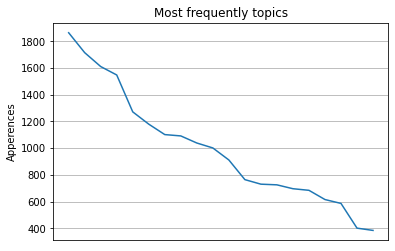

In [68]:
newnewdata = []
newnewdatanum = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
values = []
for i in new_data:
    newnewdata.append(i[1])
    values.append(i[0])
    
newnewdata
fig, ax = plt.subplots()
ax.plot(newnewdatanum, newnewdata)

ax.set(xlabel='-', ylabel='Apperences',
       title='Most frequently topics')
ax.grid()

ax.get_xaxis().set_visible(False)

fig.savefig("test.png")
plt.show()

In [64]:
lda.show_topic(13)
# Rocket launch missions, falcon launch in march

[('launch', 0.2080931),
 ('rocket', 0.052523915),
 ('mission', 0.0294311),
 ('stage', 0.025406854),
 ('company', 0.025169108),
 ('falcon', 0.023136573),
 ('vehicle', 0.021755245),
 ('failure', 0.016772611),
 ('march', 0.015034619),
 ('flight', 0.0149274375)]

In [50]:
lda.show_topic(6)
# Services given by satellites

[('satellite', 0.16947728),
 ('year', 0.03704981),
 ('service', 0.023221824),
 ('capacity', 0.020021401),
 ('percent', 0.019919429),
 ('band', 0.017389175),
 ('market', 0.01685835),
 ('customer', 0.01627095),
 ('government', 0.01575816),
 ('operator', 0.014456975)]

In [51]:
lda.show_topic(8)
# Nasa general Missions with science as focus

[('mission', 0.068749085),
 ('nasa', 0.0556728),
 ('science', 0.03395066),
 ('earth', 0.032338973),
 ('spacecraft', 0.031469632),
 ('instrument', 0.020472452),
 ('year', 0.01932041),
 ('scientist', 0.016895154),
 ('telescope', 0.015196452),
 ('noaa', 0.012496525)]

In [52]:
lda.show_topic(18)
# Nasa missions related to space stations

[('nasa', 0.12944505),
 ('station', 0.070885725),
 ('crew', 0.036838558),
 ('mission', 0.03561715),
 ('astronaut', 0.024660101),
 ('spacecraft', 0.023789922),
 ('flight', 0.01962748),
 ('shuttle', 0.018721292),
 ('cargo', 0.016005736),
 ('agency', 0.014214572)]

In [53]:
lda.show_topic(3)
# Defensive system technology, war related

[('system', 0.090628274),
 ('satellite', 0.07588915),
 ('program', 0.03729587),
 ('force', 0.032712124),
 ('defense', 0.020931115),
 ('capability', 0.02049257),
 ('missile', 0.018917704),
 ('communication', 0.017530013),
 ('ground', 0.016384745),
 ('year', 0.015843697)]

In [54]:
lda.show_topic(5)
# telecomunication systems (iridium and oneweb -> "Iridium and OneWeb to Collaborate on a Global Satellite Services Offering")

[('satellite', 0.120451994),
 ('service', 0.048866913),
 ('constellation', 0.03884175),
 ('network', 0.03861559),
 ('communication', 0.02714484),
 ('iridium', 0.023920838),
 ('oneweb', 0.022328703),
 ('operator', 0.02025841),
 ('band', 0.019377539),
 ('broadband', 0.017207362)]

In [55]:
lda.show_topic(0)
# Satellite lunch technology

[('satellite', 0.1854484),
 ('orbit', 0.07585483),
 ('payload', 0.046565693),
 ('spacecraft', 0.045923848),
 ('mission', 0.03305399),
 ('launch', 0.029620305),
 ('technology', 0.020747362),
 ('year', 0.018812442),
 ('cubesat', 0.017721472),
 ('kilogram', 0.01715228)]

In [56]:
lda.show_topic(19)
# Investment, market related stuff

[('company', 0.14846829),
 ('business', 0.040717516),
 ('market', 0.03419941),
 ('customer', 0.031749174),
 ('year', 0.031615987),
 ('investor', 0.017840022),
 ('investment', 0.017309202),
 ('startup', 0.0141192665),
 ('government', 0.013203027),
 ('industry', 0.013147773)]

In [57]:
lda.show_topic(9)
# Nasa programs viavility, and raising of resources.  

[('program', 0.0589646),
 ('nasa', 0.04730804),
 ('year', 0.044654813),
 ('budget', 0.042774167),
 ('congress', 0.031400505),
 ('agency', 0.031278726),
 ('bill', 0.030376328),
 ('report', 0.027838983),
 ('committee', 0.027586404),
 ('funding', 0.022798724)]

In [58]:
lda.show_topic(4)
# War related stuf, more bounded to USA

[('force', 0.15870176),
 ('service', 0.03535712),
 ('command', 0.030139605),
 ('pentagon', 0.023037925),
 ('defense', 0.019290898),
 ('operation', 0.015859623),
 ('acquisition', 0.015412873),
 ('security', 0.01440038),
 ('capability', 0.011269275),
 ('congress', 0.010208727)]

In [60]:
for i in range (len(corpus_bof)):
     print(i, lda.get_document_topics(corpus_bof[i], minimum_probability=0.3))

0 [(5, 0.46615946), (19, 0.34272867)]
1 [(18, 0.36956552)]
2 [(13, 0.37525713), (18, 0.31167424)]
3 [(10, 0.532151)]
4 [(8, 0.3187407), (9, 0.5908893)]
5 [(8, 0.54701513), (16, 0.32169807)]
6 [(1, 0.45273316), (2, 0.30516487)]
7 []
8 [(13, 0.40021068), (18, 0.48982129)]
9 [(18, 0.57681143)]
10 []
11 [(5, 0.6726867)]
12 [(14, 0.33638883)]
13 []
14 [(5, 0.6089176)]
15 [(0, 0.50963426)]
16 [(19, 0.6918562)]
17 [(11, 0.6799508)]
18 [(0, 0.5047271)]
19 [(11, 0.39142138)]
20 [(18, 0.5977603)]
21 [(5, 0.71372193)]
22 [(13, 0.38868207)]
23 [(14, 0.433838)]
24 [(15, 0.65305746)]
25 [(1, 0.49468836)]
26 [(11, 0.5127349)]
27 []
28 [(2, 0.31131518)]
29 [(19, 0.32433882)]
30 [(3, 0.43295923)]
31 [(5, 0.7691861)]
32 [(14, 0.42606527)]
33 []
34 [(10, 0.57596684)]
35 [(8, 0.43308112)]
36 []
37 [(18, 0.8510302)]
38 []
39 [(14, 0.30323306)]
40 [(10, 0.47530285)]
41 [(9, 0.58068424)]
42 [(4, 0.32612562), (14, 0.34742516)]
43 [(1, 0.38372675), (18, 0.43753302)]
44 [(13, 0.40448654), (18, 0.3922366)]
45 [(

416 [(10, 0.3960912)]
417 [(8, 0.51477885)]
418 [(10, 0.35705182), (17, 0.43704876)]
419 [(5, 0.3524854), (13, 0.33728793)]
420 [(18, 0.43270284)]
421 [(14, 0.49859646)]
422 [(17, 0.44876707)]
423 [(13, 0.33658582)]
424 [(5, 0.58696747)]
425 [(15, 0.30681315)]
426 [(19, 0.34097755)]
427 [(9, 0.4233668)]
428 [(15, 0.36122352)]
429 [(19, 0.32581487)]
430 [(9, 0.36385304)]
431 []
432 [(14, 0.46772414)]
433 [(9, 0.6093573)]
434 [(19, 0.62107843)]
435 [(3, 0.60292)]
436 []
437 [(5, 0.33544075)]
438 [(13, 0.76765144)]
439 []
440 []
441 [(19, 0.3785964)]
442 [(0, 0.32502982)]
443 [(11, 0.32618245)]
444 [(5, 0.40600723)]
445 [(3, 0.46069118), (4, 0.4922903)]
446 [(5, 0.48208332)]
447 []
448 [(13, 0.31549743)]
449 [(10, 0.39724776)]
450 [(1, 0.5494255)]
451 [(3, 0.49163866), (4, 0.32913375)]
452 [(18, 0.51381516)]
453 []
454 [(18, 0.5951385)]
455 [(5, 0.32496023)]
456 [(14, 0.36483586)]
457 [(0, 0.39465216)]
458 [(13, 0.31557998)]
459 [(5, 0.30926636)]
460 [(10, 0.35373467), (13, 0.3258914)]
46

828 [(13, 0.5741114)]
829 [(14, 0.47859693)]
830 [(5, 0.44821817)]
831 [(0, 0.42383444)]
832 [(10, 0.32019693), (18, 0.52645683)]
833 [(14, 0.61191994)]
834 [(8, 0.41470134)]
835 [(13, 0.5803853)]
836 [(19, 0.31346506)]
837 [(3, 0.4186758)]
838 []
839 [(19, 0.36910492)]
840 []
841 [(0, 0.3703214)]
842 [(18, 0.5311399)]
843 [(18, 0.43967697)]
844 [(19, 0.5241966)]
845 [(9, 0.43689427)]
846 [(3, 0.46403474)]
847 [(14, 0.3766725)]
848 [(5, 0.4557187)]
849 [(10, 0.6046959)]
850 [(17, 0.42848086)]
851 [(13, 0.4069319)]
852 []
853 []
854 [(9, 0.4913739)]
855 [(11, 0.31663674)]
856 []
857 [(12, 0.38762146)]
858 [(13, 0.38077697)]
859 [(0, 0.31251892), (7, 0.40807468)]
860 []
861 [(0, 0.37296423)]
862 []
863 [(0, 0.31340465)]
864 [(3, 0.34609684), (4, 0.48890343)]
865 [(18, 0.7002393)]
866 [(1, 0.34070083)]
867 []
868 [(1, 0.7482021)]
869 [(9, 0.39403304)]
870 [(18, 0.3462331)]
871 [(5, 0.35044673), (13, 0.42840827)]
872 [(1, 0.3737596), (16, 0.3355871)]
873 [(4, 0.3638782), (15, 0.46391797)]


1250 [(18, 0.30679244)]
1251 [(0, 0.3099772)]
1252 [(4, 0.33573806), (15, 0.30897224)]
1253 [(3, 0.38971406)]
1254 [(18, 0.4569973)]
1255 []
1256 [(3, 0.5861302)]
1257 [(14, 0.38506913), (15, 0.3922861)]
1258 [(5, 0.7437814)]
1259 [(13, 0.30645743)]
1260 []
1261 [(18, 0.41394985)]
1262 [(15, 0.45598283)]
1263 [(18, 0.40986297)]
1264 [(13, 0.37706974), (19, 0.3697586)]
1265 [(18, 0.3687397)]
1266 [(11, 0.37645614)]
1267 [(5, 0.57005703)]
1268 [(2, 0.49993455), (17, 0.3186094)]
1269 [(14, 0.6942581)]
1270 [(18, 0.80713284)]
1271 [(3, 0.49853802)]
1272 [(19, 0.6221178)]
1273 [(5, 0.33512414), (11, 0.3328232)]
1274 []
1275 [(8, 0.41042015)]
1276 []
1277 [(13, 0.55552995)]
1278 [(11, 0.3065434)]
1279 [(19, 0.58105665)]
1280 [(5, 0.606916)]
1281 [(14, 0.43067208), (19, 0.3642612)]
1282 [(8, 0.68609947)]
1283 [(16, 0.5061131)]
1284 []
1285 [(0, 0.3293978)]
1286 [(14, 0.5487771)]
1287 [(9, 0.65327734)]
1288 [(13, 0.30832025)]
1289 [(15, 0.80147845)]
1290 [(12, 0.5657148)]
1291 [(0, 0.32620677)

1665 [(3, 0.3052137), (4, 0.32250616)]
1666 [(9, 0.52611786)]
1667 [(5, 0.36853173), (19, 0.40033114)]
1668 [(1, 0.4102605)]
1669 [(11, 0.30534574)]
1670 [(11, 0.30636367), (14, 0.30109802)]
1671 [(0, 0.3546089), (19, 0.3187575)]
1672 [(14, 0.46117035), (19, 0.37543857)]
1673 [(7, 0.61884516)]
1674 [(0, 0.49655142)]
1675 []
1676 [(5, 0.3441607), (14, 0.4385572)]
1677 [(3, 0.4247277), (5, 0.44679707)]
1678 [(5, 0.56522274)]
1679 [(19, 0.535478)]
1680 [(8, 0.7807206)]
1681 [(19, 0.34463423)]
1682 [(3, 0.72872007)]
1683 [(19, 0.30377442)]
1684 []
1685 [(8, 0.8147979)]
1686 [(5, 0.67683977)]
1687 [(15, 0.48805416)]
1688 [(13, 0.42430723)]
1689 [(3, 0.37820995)]
1690 [(17, 0.38286048)]
1691 [(15, 0.53262335)]
1692 [(11, 0.33851916), (19, 0.3068226)]
1693 [(14, 0.40941083)]
1694 [(0, 0.3912309)]
1695 [(5, 0.32469714)]
1696 [(13, 0.55188096)]
1697 [(18, 0.51421463)]
1698 [(18, 0.5688987)]
1699 [(4, 0.49635562)]
1700 [(19, 0.33440349)]
1701 [(7, 0.33387935)]
1702 [(4, 0.75143796)]
1703 [(0, 0.

2032 [(13, 0.3626416)]
2033 []
2034 []
2035 [(5, 0.43374553)]
2036 [(19, 0.5220483)]
2037 [(10, 0.41852367)]
2038 [(5, 0.3258121), (6, 0.34437302)]
2039 [(14, 0.5671011)]
2040 [(5, 0.81012315)]
2041 [(11, 0.41426834)]
2042 [(16, 0.6254731)]
2043 []
2044 [(3, 0.38620353), (14, 0.3070489)]
2045 []
2046 []
2047 [(18, 0.9945197)]
2048 [(10, 0.4005338), (12, 0.31728718)]
2049 []
2050 []
2051 [(8, 0.85091126)]
2052 [(19, 0.34748587)]
2053 [(5, 0.33014417), (19, 0.48555943)]
2054 [(4, 0.37266415)]
2055 []
2056 [(15, 0.47077727)]
2057 [(3, 0.37679917)]
2058 [(9, 0.42187324)]
2059 [(6, 0.36428034), (19, 0.34975946)]
2060 [(15, 0.63710445)]
2061 []
2062 [(18, 0.55998844)]
2063 [(19, 0.42295557)]
2064 []
2065 []
2066 [(16, 0.5003391)]
2067 [(16, 0.8363896)]
2068 []
2069 [(5, 0.7687496)]
2070 [(13, 0.3032279), (15, 0.34163758)]
2071 [(15, 0.7104509)]
2072 [(4, 0.506348)]
2073 [(9, 0.35066783)]
2074 [(5, 0.5977403)]
2075 [(5, 0.45548236)]
2076 [(5, 0.35258624)]
2077 [(19, 0.45481277)]
2078 []
2079 

2457 [(8, 0.352284), (17, 0.3004972)]
2458 [(19, 0.54761577)]
2459 [(19, 0.32254663)]
2460 []
2461 [(2, 0.59134907), (3, 0.30771723)]
2462 []
2463 [(4, 0.32469895), (9, 0.427429)]
2464 [(3, 0.39481562)]
2465 [(0, 0.3111815), (13, 0.35046428)]
2466 [(9, 0.44660303), (15, 0.38582832)]
2467 []
2468 [(9, 0.5516615)]
2469 [(19, 0.35017365)]
2470 []
2471 [(8, 0.6221192)]
2472 [(1, 0.45835024)]
2473 [(17, 0.4256943)]
2474 [(13, 0.57509923)]
2475 [(4, 0.6447527)]
2476 [(9, 0.691207)]
2477 [(18, 0.6193617)]
2478 [(5, 0.35681474)]
2479 [(13, 0.6267715)]
2480 [(13, 0.6697122)]
2481 [(1, 0.47882974)]
2482 [(1, 0.36857858)]
2483 [(4, 0.53490794)]
2484 []
2485 [(7, 0.4636804)]
2486 []
2487 [(13, 0.44368294)]
2488 [(5, 0.59319156)]
2489 [(19, 0.6841072)]
2490 []
2491 [(17, 0.4033948), (18, 0.35164422)]
2492 [(3, 0.3806105)]
2493 [(7, 0.36141005)]
2494 [(8, 0.42752588), (17, 0.38321227)]
2495 [(17, 0.335193)]
2496 []
2497 [(14, 0.6486395)]
2498 [(14, 0.560841)]
2499 [(8, 0.55227613), (9, 0.33218583)]


2865 [(0, 0.35685995)]
2866 [(8, 0.5689924)]
2867 [(3, 0.31137434), (14, 0.38485602)]
2868 [(5, 0.46677956)]
2869 [(9, 0.54107684), (17, 0.3256894)]
2870 [(11, 0.37887487)]
2871 [(5, 0.42078608)]
2872 [(7, 0.32665846)]
2873 [(11, 0.30284742)]
2874 [(15, 0.38024783)]
2875 [(18, 0.35309356)]
2876 [(3, 0.59288055)]
2877 [(17, 0.4178103)]
2878 [(5, 0.530951)]
2879 [(19, 0.39479536)]
2880 [(9, 0.37932926), (17, 0.48108658)]
2881 [(3, 0.66134965)]
2882 [(4, 0.66649324)]
2883 [(5, 0.37292227), (13, 0.46714997)]
2884 [(11, 0.31636906), (14, 0.39792532)]
2885 [(14, 0.3996312)]
2886 []
2887 [(5, 0.30937588)]
2888 [(10, 0.43598258)]
2889 []
2890 []
2891 [(17, 0.30185187)]
2892 []
2893 [(17, 0.3024509)]
2894 []
2895 []
2896 []
2897 [(6, 0.7521621)]
2898 [(5, 0.38358086)]
2899 [(17, 0.34070915)]
2900 []
2901 [(15, 0.34573716), (19, 0.43573555)]
2902 []
2903 [(4, 0.6354231)]
2904 [(3, 0.51569647)]
2905 [(18, 0.3948098)]
2906 [(3, 0.5945245)]
2907 [(3, 0.8896824)]
2908 [(17, 0.39658135)]
2909 [(4, 0.

3275 [(13, 0.42935124)]
3276 [(8, 0.36212984)]
3277 [(1, 0.35159975)]
3278 [(16, 0.4131715), (18, 0.30596784)]
3279 [(5, 0.38364905), (15, 0.37332872)]
3280 [(5, 0.31443664), (6, 0.43143257)]
3281 [(4, 0.44878557), (9, 0.32512185)]
3282 []
3283 []
3284 [(19, 0.4533767)]
3285 [(13, 0.30676338)]
3286 [(14, 0.55540437)]
3287 [(15, 0.34270164), (16, 0.358791)]
3288 []
3289 [(4, 0.32144025), (9, 0.49994028)]
3290 [(6, 0.6588253)]
3291 [(19, 0.3578996)]
3292 [(18, 0.3460957)]
3293 [(14, 0.35649288)]
3294 []
3295 [(18, 0.4708221)]
3296 [(15, 0.4529641)]
3297 [(11, 0.35656384)]
3298 [(5, 0.3167415), (19, 0.47487816)]
3299 [(0, 0.3172648), (16, 0.32797816)]
3300 [(17, 0.46164533), (18, 0.34193012)]
3301 [(4, 0.31677583)]
3302 []
3303 [(11, 0.31559917)]
3304 [(17, 0.6298958)]
3305 [(4, 0.3852016)]
3306 [(16, 0.6187689)]
3307 [(13, 0.64567435)]
3308 [(13, 0.30648753)]
3309 [(6, 0.5401731)]
3310 [(1, 0.39683995)]
3311 []
3312 [(11, 0.5218799)]
3313 [(4, 0.60284567)]
3314 [(13, 0.705903)]
3315 [(8,

3681 [(12, 0.35662997), (13, 0.30351335)]
3682 [(18, 0.45784065)]
3683 [(13, 0.51521677)]
3684 []
3685 [(11, 0.3192)]
3686 [(14, 0.75340813)]
3687 []
3688 []
3689 [(13, 0.34282067)]
3690 [(4, 0.3611069), (9, 0.4606282)]
3691 [(9, 0.48283026)]
3692 [(5, 0.3616721)]
3693 [(8, 0.75984836)]
3694 [(8, 0.31031355)]
3695 [(16, 0.5245254), (18, 0.30686343)]
3696 [(13, 0.54852027)]
3697 [(13, 0.37828737)]
3698 [(5, 0.36375085)]
3699 [(5, 0.34520358)]
3700 [(6, 0.6337579)]
3701 [(13, 0.57891417)]
3702 [(13, 0.8158045)]
3703 [(0, 0.3388525)]
3704 [(4, 0.6483375), (19, 0.33228564)]
3705 [(18, 0.42422625)]
3706 []
3707 [(1, 0.5558637)]
3708 [(14, 0.40837386)]
3709 []
3710 [(17, 0.32215327)]
3711 [(16, 0.38958886)]
3712 []
3713 [(19, 0.39463636)]
3714 [(2, 0.45151126), (3, 0.32827795)]
3715 [(15, 0.416219)]
3716 [(13, 0.3503276)]
3717 []
3718 [(11, 0.30814078)]
3719 [(18, 0.31141734)]
3720 [(13, 0.6302887)]
3721 []
3722 []
3723 [(17, 0.42985138)]
3724 [(13, 0.45138618)]
3725 [(8, 0.31650016)]
3726 [

4076 [(16, 0.5412605)]
4077 [(4, 0.5391268)]
4078 [(0, 0.5560337)]
4079 [(0, 0.31749842)]
4080 [(18, 0.5127234)]
4081 [(8, 0.3762181)]
4082 []
4083 [(4, 0.8227173)]
4084 [(4, 0.7580062)]
4085 [(18, 0.4832824)]
4086 [(18, 0.6167624)]
4087 [(10, 0.378734), (13, 0.33971632)]
4088 [(0, 0.3939757), (19, 0.38034335)]
4089 [(5, 0.43748906)]
4090 [(3, 0.4626588)]
4091 [(0, 0.36702463)]
4092 []
4093 [(19, 0.3649282)]
4094 []
4095 [(13, 0.31115684), (16, 0.33054027)]
4096 [(19, 0.5650566)]
4097 [(5, 0.44264138)]
4098 [(13, 0.3060698)]
4099 []
4100 [(13, 0.5813998)]
4101 [(0, 0.31998664)]
4102 [(19, 0.35152125)]
4103 [(18, 0.4411803)]
4104 [(9, 0.48185745)]
4105 [(4, 0.3366369)]
4106 [(1, 0.49818844)]
4107 [(6, 0.32454413)]
4108 [(9, 0.6279658)]
4109 [(9, 0.5287203), (17, 0.35188818)]
4110 [(14, 0.37332952)]
4111 [(2, 0.534311)]
4112 [(19, 0.44592455)]
4113 [(9, 0.48043847), (17, 0.3296199)]
4114 [(11, 0.3282094)]
4115 [(2, 0.3746009), (4, 0.5053715)]
4116 [(8, 0.69869846)]
4117 []
4118 [(18, 0.5

4478 [(5, 0.51339954)]
4479 [(8, 0.6511611)]
4480 [(6, 0.4471173)]
4481 [(17, 0.3112702)]
4482 [(0, 0.39437786), (15, 0.35294887)]
4483 []
4484 [(14, 0.3292641), (15, 0.33934486)]
4485 [(13, 0.6175009)]
4486 [(15, 0.54313844)]
4487 [(2, 0.32095563), (4, 0.32885525)]
4488 [(5, 0.31934613)]
4489 []
4490 [(0, 0.3690041)]
4491 [(10, 0.34597278), (17, 0.31380212)]
4492 [(18, 0.30844256)]
4493 [(15, 0.33929652)]
4494 []
4495 [(9, 0.6871853)]
4496 [(2, 0.3201874), (4, 0.32706127)]
4497 [(12, 0.40810153)]
4498 [(4, 0.6515648)]
4499 []
4500 [(16, 0.3200307)]
4501 [(5, 0.37219173)]
4502 [(15, 0.39623657)]
4503 [(4, 0.6355987)]
4504 [(2, 0.5152535)]
4505 [(5, 0.7360771)]
4506 [(2, 0.3001435), (18, 0.44567314)]
4507 []
4508 [(15, 0.32490543)]
4509 [(14, 0.6982008)]
4510 [(5, 0.41268277)]
4511 [(2, 0.5130888)]
4512 []
4513 [(5, 0.42073336)]
4514 [(0, 0.40559837), (17, 0.33695182)]
4515 [(15, 0.6487582)]
4516 [(6, 0.4701266)]
4517 [(5, 0.45244372)]
4518 [(14, 0.41615486)]
4519 [(14, 0.47857735), (19

4871 [(4, 0.6307138)]
4872 [(6, 0.70409065)]
4873 [(0, 0.41539413)]
4874 [(9, 0.6918511)]
4875 [(5, 0.3569295), (14, 0.32818136)]
4876 [(0, 0.36652637)]
4877 [(9, 0.6207254)]
4878 [(11, 0.34803706)]
4879 [(0, 0.3235871)]
4880 [(3, 0.34227577)]
4881 [(18, 0.4562718)]
4882 [(17, 0.4635778)]
4883 [(2, 0.33354613)]
4884 [(8, 0.4434013)]
4885 []
4886 [(9, 0.44764325), (17, 0.38643432)]
4887 [(8, 0.4126277), (9, 0.3113081)]
4888 [(9, 0.5505087), (17, 0.39922968)]
4889 [(2, 0.39185047)]
4890 [(16, 0.3123613), (19, 0.37420282)]
4891 [(10, 0.37910995)]
4892 [(4, 0.81290597)]
4893 [(4, 0.81365323)]
4894 [(8, 0.65197057)]
4895 [(3, 0.53678596)]
4896 []
4897 [(13, 0.38787413)]
4898 [(8, 0.47529054), (12, 0.3930248)]
4899 [(9, 0.5324628), (17, 0.36979225)]
4900 []
4901 []
4902 [(8, 0.4443909), (14, 0.46161047)]
4903 [(18, 0.3861817)]
4904 [(16, 0.5628094)]
4905 []
4906 [(0, 0.30228868)]
4907 [(4, 0.78345984)]
4908 [(19, 0.3552882)]
4909 [(1, 0.31315586), (2, 0.330329)]
4910 []
4911 [(19, 0.48387676

5260 [(4, 0.92633975)]
5261 []
5262 [(11, 0.40021944)]
5263 [(19, 0.4750815)]
5264 [(18, 0.8164609)]
5265 [(9, 0.68346)]
5266 [(4, 0.6793459)]
5267 [(1, 0.49812979)]
5268 [(13, 0.3067104)]
5269 [(1, 0.3600179), (2, 0.3813691)]
5270 [(5, 0.39490145)]
5271 [(18, 0.31633446)]
5272 [(13, 0.37937108)]
5273 []
5274 [(18, 0.69182795)]
5275 [(5, 0.4824911), (15, 0.40120697)]
5276 []
5277 [(4, 0.34150547)]
5278 []
5279 [(4, 0.72340447)]
5280 [(3, 0.46381456)]
5281 [(5, 0.44453827)]
5282 [(4, 0.52900815)]
5283 [(17, 0.36911562)]
5284 [(5, 0.53388935)]
5285 []
5286 [(6, 0.7947916)]
5287 [(6, 0.30018395), (19, 0.47450978)]
5288 [(0, 0.33395913)]
5289 [(5, 0.4307012), (11, 0.30984694)]
5290 [(8, 0.88326144)]
5291 [(8, 0.38912103)]
5292 [(4, 0.4199825)]
5293 [(5, 0.50383013)]
5294 [(5, 0.5428203), (19, 0.33657372)]
5295 [(13, 0.33292127), (16, 0.5367436)]
5296 [(0, 0.40173903)]
5297 [(4, 0.7862087)]
5298 [(3, 0.4914401)]
5299 []
5300 [(13, 0.46886766)]
5301 []
5302 [(4, 0.48156914)]
5303 [(4, 0.5433

5653 [(13, 0.5640487)]
5654 [(7, 0.371652), (14, 0.35237196)]
5655 [(13, 0.6032782)]
5656 [(6, 0.31262848)]
5657 [(4, 0.59930444)]
5658 []
5659 [(13, 0.32758692)]
5660 [(4, 0.3785831)]
5661 [(1, 0.38545766)]
5662 [(6, 0.4450372)]
5663 [(7, 0.3376932)]
5664 [(13, 0.53415513), (18, 0.38170677)]
5665 [(13, 0.3348057)]
5666 [(4, 0.51720154)]
5667 [(13, 0.3111827), (18, 0.6161612)]
5668 [(6, 0.42134622)]
5669 [(0, 0.3966971), (13, 0.41872334)]
5670 [(5, 0.3782616)]
5671 [(13, 0.40082106), (18, 0.50782675)]
5672 [(4, 0.31444958)]
5673 [(4, 0.72914964)]
5674 [(16, 0.61978734)]
5675 [(4, 0.63701046)]
5676 [(4, 0.3603653)]
5677 [(0, 0.424351)]
5678 [(15, 0.3812579)]
5679 [(17, 0.3672974)]
5680 [(5, 0.585037)]
5681 [(0, 0.31361246)]
5682 []
5683 [(4, 0.5790459), (9, 0.33655164)]
5684 [(1, 0.6875157)]
5685 []
5686 [(5, 0.41472515)]
5687 [(5, 0.46212408)]
5688 [(13, 0.3102004)]
5689 [(5, 0.45140922)]
5690 [(8, 0.520728)]
5691 [(7, 0.35045153), (19, 0.40176898)]
5692 [(4, 0.56067646)]
5693 [(8, 0.6

6034 [(6, 0.37225777), (13, 0.5351826)]
6035 [(10, 0.35436225)]
6036 []
6037 [(1, 0.45274895)]
6038 [(15, 0.48759913)]
6039 [(13, 0.42700478)]
6040 [(0, 0.34306273)]
6041 []
6042 [(13, 0.5190039)]
6043 [(4, 0.43213648)]
6044 [(19, 0.39779702)]
6045 [(8, 0.84729534)]
6046 [(8, 0.6267337)]
6047 [(4, 0.7765684)]
6048 [(15, 0.4249436)]
6049 [(17, 0.41832012)]
6050 [(3, 0.38788202)]
6051 [(19, 0.4850665)]
6052 [(1, 0.57211083)]
6053 []
6054 [(8, 0.59223706)]
6055 [(0, 0.44070038), (19, 0.37660548)]
6056 [(2, 0.399755)]
6057 [(1, 0.46236092)]
6058 [(18, 0.69535697)]
6059 [(13, 0.36784106)]
6060 [(8, 0.51790196)]
6061 [(3, 0.44591784)]
6062 [(15, 0.37745115)]
6063 [(17, 0.4886074)]
6064 []
6065 []
6066 [(16, 0.36878583)]
6067 [(5, 0.32968396)]
6068 []
6069 [(3, 0.31684545), (7, 0.41762453)]
6070 [(13, 0.31341046), (16, 0.67295015)]
6071 [(6, 0.3329175), (19, 0.47410417)]
6072 [(5, 0.44631496)]
6073 [(4, 0.79857296)]
6074 [(0, 0.4875226), (19, 0.3240311)]
6075 [(18, 0.6670684)]
6076 [(5, 0.394

6427 [(6, 0.5948383)]
6428 [(5, 0.56881446)]
6429 [(3, 0.41436335)]
6430 [(14, 0.44396794)]
6431 [(1, 0.30738723)]
6432 [(1, 0.42668945)]
6433 [(1, 0.44937822)]
6434 [(5, 0.5574162)]
6435 [(13, 0.33333886)]
6436 []
6437 [(10, 0.30224475)]
6438 [(14, 0.46651483)]
6439 []
6440 [(5, 0.62013215)]
6441 [(6, 0.8600801)]
6442 []
6443 [(18, 0.44065353)]
6444 [(3, 0.7185236)]
6445 []
6446 []
6447 [(18, 0.5070466)]
6448 [(8, 0.32774636), (9, 0.42695555)]
6449 [(14, 0.58692145)]
6450 [(18, 0.66576934)]
6451 [(5, 0.3818778)]
6452 []
6453 [(5, 0.5584271)]
6454 [(9, 0.51399064)]
6455 [(9, 0.59745276)]
6456 [(19, 0.307372)]
6457 []
6458 [(5, 0.30218288)]
6459 [(5, 0.3235531), (6, 0.41538197)]
6460 [(18, 0.73771083)]
6461 [(4, 0.67106825)]
6462 [(4, 0.33897275)]
6463 [(6, 0.6361637)]
6464 []
6465 [(3, 0.40754873)]
6466 [(5, 0.33251083)]
6467 [(8, 0.3725935)]
6468 [(14, 0.46086103)]
6469 [(14, 0.41642368)]
6470 [(13, 0.51391953)]
6471 [(6, 0.33185202)]
6472 [(8, 0.3960164)]
6473 [(1, 0.5223941)]
6474 [

6810 [(15, 0.6565694)]
6811 []
6812 [(0, 0.35737357)]
6813 [(17, 0.4598582)]
6814 []
6815 [(19, 0.35197973)]
6816 [(13, 0.34534007)]
6817 [(13, 0.4878195)]
6818 [(15, 0.70044124)]
6819 [(3, 0.68674904)]
6820 [(3, 0.48933855)]
6821 [(12, 0.31091017), (18, 0.3766113)]
6822 [(0, 0.30670112)]
6823 [(13, 0.33474347)]
6824 [(6, 0.63955027)]
6825 [(1, 0.43111306)]
6826 [(18, 0.30650976)]
6827 [(6, 0.31084347)]
6828 []
6829 [(5, 0.32347235), (6, 0.4872948)]
6830 [(15, 0.8030175)]
6831 [(5, 0.4366176)]
6832 [(3, 0.37329555), (10, 0.31435183)]
6833 [(9, 0.5188593)]
6834 [(15, 0.35857603)]
6835 []
6836 [(3, 0.3519493)]
6837 [(3, 0.47888672)]
6838 [(9, 0.42325258)]
6839 []
6840 []
6841 []
6842 [(9, 0.33549127), (18, 0.30660245)]
6843 [(0, 0.3194925)]
6844 [(5, 0.56348205)]
6845 [(18, 0.61762905)]
6846 []
6847 []
6848 [(14, 0.418742)]
6849 [(18, 0.44496182)]
6850 [(2, 0.55526984)]
6851 []
6852 [(4, 0.41251352), (9, 0.44671363)]
6853 [(5, 0.32420412)]
6854 []
6855 []
6856 [(13, 0.58691746)]
6857 [(1

7184 []
7185 [(11, 0.5111855)]
7186 []
7187 [(1, 0.32392326)]
7188 [(7, 0.3165784)]
7189 [(0, 0.34912938)]
7190 [(8, 0.35803246), (9, 0.47295737)]
7191 [(14, 0.37829408)]
7192 [(10, 0.32412276), (12, 0.43795246)]
7193 [(4, 0.3910277)]
7194 [(0, 0.48061118)]
7195 [(7, 0.4326039)]
7196 [(17, 0.3128319)]
7197 [(18, 0.3466975)]
7198 [(13, 0.450784), (16, 0.32940128)]
7199 [(11, 0.4701563)]
7200 []
7201 [(5, 0.6112315)]
7202 [(6, 0.48067072)]
7203 [(8, 0.7831543)]
7204 [(1, 0.3008004)]
7205 [(8, 0.5407238)]
7206 [(5, 0.3822076)]
7207 [(3, 0.45386833)]
7208 [(11, 0.36541006), (15, 0.32558823)]
7209 [(19, 0.67203605)]
7210 [(1, 0.37604788), (16, 0.51434267)]
7211 [(14, 0.3500213)]
7212 [(5, 0.33069837), (13, 0.46177635)]
7213 [(5, 0.49825674)]
7214 [(8, 0.6641624)]
7215 [(9, 0.33105618)]
7216 [(6, 0.36163965), (13, 0.4936549)]
7217 [(17, 0.3343742)]
7218 [(13, 0.37279102), (18, 0.47204402)]
7219 []
7220 [(4, 0.44783062)]
7221 [(17, 0.50026727)]
7222 [(7, 0.35731903)]
7223 []
7224 [(8, 0.30136

7565 [(16, 0.32060486)]
7566 [(9, 0.50930744)]
7567 [(1, 0.391667)]
7568 [(12, 0.5896266)]
7569 [(0, 0.42253172)]
7570 [(5, 0.31318688)]
7571 []
7572 [(16, 0.4099076)]
7573 [(12, 0.30133322), (19, 0.40866777)]
7574 [(9, 0.72054106)]
7575 [(13, 0.36580235)]
7576 [(14, 0.39953735), (19, 0.32016355)]
7577 [(1, 0.3658725), (16, 0.30675212)]
7578 [(13, 0.5450742)]
7579 [(1, 0.4156678)]
7580 [(13, 0.7713398)]
7581 [(13, 0.7285653)]
7582 [(0, 0.33411267)]
7583 []
7584 [(5, 0.649976)]
7585 [(8, 0.36986205), (9, 0.56018084)]
7586 []
7587 [(4, 0.62469596)]
7588 [(7, 0.37603238)]
7589 []
7590 []
7591 [(5, 0.3630347), (11, 0.47746062)]
7592 [(3, 0.32237542)]
7593 []
7594 [(13, 0.31547803)]
7595 [(8, 0.61732924)]
7596 [(5, 0.35932684), (13, 0.34585407)]
7597 [(4, 0.67391306)]
7598 [(8, 0.63521993)]
7599 []
7600 []
7601 [(13, 0.35327137)]
7602 [(13, 0.36870956)]
7603 [(0, 0.3129638)]
7604 [(19, 0.34110066)]
7605 [(0, 0.32721958), (19, 0.32836235)]
7606 [(6, 0.7791929)]
7607 [(0, 0.3819459)]
7608 []


8302 [(6, 0.32021725), (13, 0.47282016)]
8303 [(6, 0.56657344)]
8304 [(16, 0.9858951)]
8305 [(4, 0.74585676)]
8306 [(17, 0.4938623)]
8307 [(3, 0.47294998)]
8308 [(6, 0.7948366)]
8309 [(6, 0.30435175), (19, 0.40731135)]
8310 []
8311 [(12, 0.67813617)]
8312 [(5, 0.44075695)]
8313 [(16, 0.81755424)]
8314 [(13, 0.6054575)]
8315 [(15, 0.5312424)]
8316 [(6, 0.65261775)]
8317 [(6, 0.8174858)]
8318 []
8319 []
8320 [(6, 0.4331833), (14, 0.31544298)]
8321 [(7, 0.35470054)]
8322 [(15, 0.4687847)]
8323 [(0, 0.33706132)]
8324 [(7, 0.4656944)]
8325 [(12, 0.6454892)]
8326 [(0, 0.43906984), (4, 0.32578242)]
8327 [(13, 0.33272758), (16, 0.3532859)]
8328 []
8329 [(8, 0.72467977)]
8330 []
8331 [(8, 0.8446015)]
8332 [(8, 0.3683689)]
8333 [(8, 0.50802773)]
8334 [(15, 0.48071066)]
8335 [(13, 0.4248686), (18, 0.50091684)]
8336 [(13, 0.34187546)]
8337 [(12, 0.5666683)]
8338 [(18, 0.5944465)]
8339 [(13, 0.3343717), (18, 0.4196549)]
8340 [(3, 0.7510127)]
8341 [(16, 0.58775866)]
8342 [(18, 0.74339956)]
8343 []
8

8667 []
8668 [(17, 0.30311316)]
8669 []
8670 [(1, 0.3523309)]
8671 [(5, 0.45868644)]
8672 []
8673 [(2, 0.4200524), (3, 0.36841044)]
8674 [(8, 0.63666475), (9, 0.32155904)]
8675 []
8676 [(8, 0.52477413)]
8677 [(7, 0.3552045), (19, 0.31014344)]
8678 [(1, 0.30722132)]
8679 [(1, 0.39993602), (3, 0.36500627)]
8680 [(1, 0.34462062)]
8681 [(13, 0.33578214)]
8682 [(7, 0.44038728)]
8683 [(6, 0.54410434)]
8684 [(17, 0.35106525)]
8685 []
8686 [(9, 0.38988113)]
8687 [(5, 0.58989817)]
8688 []
8689 [(6, 0.57464045)]
8690 [(9, 0.38375747)]
8691 [(1, 0.38797042)]
8692 [(8, 0.31491274), (9, 0.6157306)]
8693 [(10, 0.32566905)]
8694 [(13, 0.32021582)]
8695 [(8, 0.564877)]
8696 [(13, 0.3140097), (18, 0.6397176)]
8697 []
8698 [(15, 0.3239491)]
8699 [(15, 0.40165937)]
8700 []
8701 []
8702 [(7, 0.4014872), (19, 0.31050405)]
8703 [(6, 0.3063675)]
8704 [(13, 0.44985104)]
8705 [(16, 0.5956534)]
8706 [(13, 0.3672332)]
8707 [(13, 0.5408563)]
8708 []
8709 [(1, 0.32440773), (7, 0.37525204)]
8710 [(13, 0.43821245), 

9424 [(1, 0.4527423)]
9425 [(2, 0.31322902), (3, 0.3541311)]
9426 [(17, 0.49504748)]
9427 []
9428 [(14, 0.31902474)]
9429 [(6, 0.58367884)]
9430 []
9431 [(7, 0.3428063)]
9432 []
9433 [(8, 0.4294966), (17, 0.37914157)]
9434 [(17, 0.515893)]
9435 []
9436 [(2, 0.48137096), (3, 0.37861928)]
9437 [(6, 0.62680405)]
9438 [(2, 0.5203212)]
9439 [(1, 0.34488946)]
9440 [(8, 0.7609619)]
9441 [(5, 0.39579132), (19, 0.32250333)]
9442 [(1, 0.4742257), (7, 0.32679823)]
9443 [(6, 0.5139959)]
9444 []
9445 [(17, 0.34501395)]
9446 []
9447 [(9, 0.732552)]
9448 [(14, 0.32811332)]
9449 [(1, 0.54887134)]
9450 [(6, 0.4622671)]
9451 []
9452 [(8, 0.83332855)]
9453 [(1, 0.5041404)]
9454 [(18, 0.779239)]
9455 [(6, 0.7051509)]
9456 []
9457 [(6, 0.38472793)]
9458 [(1, 0.43570992), (16, 0.42461047)]
9459 [(2, 0.4315724)]
9460 [(1, 0.3707515)]
9461 [(0, 0.30441198), (13, 0.44028208)]
9462 [(9, 0.50263333)]
9463 [(8, 0.3996066), (9, 0.424422)]
9464 [(0, 0.39663222)]
9465 [(8, 0.3464407)]
9466 [(3, 0.5672464)]
9467 []
9

9799 [(7, 0.45604402)]
9800 [(14, 0.39924785)]
9801 [(4, 0.43030706)]
9802 [(9, 0.48450384)]
9803 [(3, 0.34131712)]
9804 []
9805 [(1, 0.30594927), (18, 0.48121276)]
9806 [(8, 0.5849995)]
9807 [(9, 0.5152719)]
9808 []
9809 [(5, 0.31362033)]
9810 [(1, 0.6096812)]
9811 [(7, 0.3100648), (8, 0.41374525)]
9812 [(5, 0.43987158), (15, 0.32289916)]
9813 [(0, 0.38488507)]
9814 [(8, 0.4608526)]
9815 [(9, 0.43861094)]
9816 []
9817 [(9, 0.6265646)]
9818 [(8, 0.42134085)]
9819 [(18, 0.7165485)]
9820 [(5, 0.3463947)]
9821 [(13, 0.4430073)]
9822 [(8, 0.30466485), (9, 0.31009266)]
9823 [(7, 0.4740436)]
9824 [(9, 0.75059795)]
9825 [(16, 0.46354973)]
9826 []
9827 [(3, 0.63523316)]
9828 []
9829 [(5, 0.36502892)]
9830 [(16, 0.5077918)]
9831 []
9832 [(3, 0.4959518)]
9833 [(3, 0.5113031)]
9834 []
9835 [(8, 0.45542017)]
9836 [(8, 0.6227389), (14, 0.3152016)]
9837 [(9, 0.61411875)]
9838 [(6, 0.4797649)]
9839 [(9, 0.809828)]
9840 [(0, 0.3359893)]
9841 [(8, 0.43622708)]
9842 [(7, 0.33984876)]
9843 [(0, 0.3040004

10200 [(3, 0.9309154)]
10201 [(9, 0.45702934)]
10202 []
10203 [(8, 0.617094)]
10204 [(6, 0.47755152)]
10205 [(7, 0.3476405)]
10206 [(5, 0.32140535), (6, 0.48360848)]
10207 []
10208 [(16, 0.36140865)]
10209 [(13, 0.44105268)]
10210 [(0, 0.35288692)]
10211 [(18, 0.6088527)]
10212 [(0, 0.44757363)]
10213 [(1, 0.57861364)]
10214 [(6, 0.79030716)]
10215 [(15, 0.30206951), (16, 0.5264709)]
10216 []
10217 [(1, 0.84237176)]
10218 []
10219 [(5, 0.39748827)]
10220 [(6, 0.3467385)]
10221 [(19, 0.619608)]
10222 [(0, 0.30574355)]
10223 [(13, 0.34101292), (19, 0.3594037)]
10224 [(9, 0.586172)]
10225 [(16, 0.5874257)]
10226 [(10, 0.31445023)]
10227 [(3, 0.49748826)]
10228 [(13, 0.31372982)]
10229 [(4, 0.34627858)]
10230 [(1, 0.49349716)]
10231 [(17, 0.7683311)]
10232 [(9, 0.35708788)]
10233 [(6, 0.34267494), (14, 0.31411183)]
10234 [(6, 0.4105812), (19, 0.34171772)]
10235 [(7, 0.36539447), (19, 0.5030582)]
10236 [(18, 0.51782477)]
10237 []
10238 [(12, 0.33632186)]
10239 [(19, 0.31216103)]
10240 [(3, 

10604 []
10605 [(0, 0.3240774), (7, 0.50092506)]
10606 [(5, 0.3339064), (6, 0.38562277)]
10607 [(4, 0.6085093)]
10608 [(6, 0.45812443)]
10609 [(3, 0.60845894)]
10610 [(6, 0.68945265)]
10611 [(1, 0.49453902)]
10612 []
10613 [(18, 0.5927248)]
10614 [(15, 0.5146903)]
10615 [(8, 0.718743)]
10616 [(7, 0.61464745)]
10617 [(3, 0.73569906)]
10618 [(6, 0.34775683), (13, 0.48628673)]
10619 [(6, 0.7311317)]
10620 [(16, 0.74383605)]
10621 [(6, 0.43828043)]
10622 [(2, 0.34163123), (3, 0.38551378)]
10623 []
10624 [(9, 0.47918558)]
10625 [(3, 0.45187196)]
10626 []
10627 [(5, 0.3068583), (6, 0.41625786)]
10628 [(7, 0.41350666), (10, 0.32533646)]
10629 [(18, 0.61877507)]
10630 [(16, 0.7318174)]
10631 [(16, 0.67570233)]
10632 [(9, 0.3470165)]
10633 [(6, 0.7468981)]
10634 [(16, 0.7150751)]
10635 [(12, 0.39415568)]
10636 [(16, 0.7773567)]
10637 [(0, 0.37801242)]
10638 [(3, 0.36832443)]
10639 [(6, 0.421853)]
10640 []
10641 [(3, 0.3541772)]
10642 [(16, 0.7359742)]
10643 [(13, 0.35594946), (18, 0.353122)]
10

11022 [(12, 0.344202)]
11023 [(13, 0.32557985), (18, 0.4501427)]
11024 []
11025 []
11026 [(13, 0.42568862)]
11027 [(6, 0.73162943)]
11028 [(5, 0.62415534)]
11029 [(7, 0.3225925)]
11030 []
11031 []
11032 [(7, 0.4738824)]
11033 [(7, 0.529506)]
11034 [(8, 0.38459602)]
11035 []
11036 [(8, 0.724713)]
11037 [(0, 0.40682584)]
11038 [(18, 0.43596968)]
11039 [(13, 0.3292521), (18, 0.38236114)]
11040 [(19, 0.34897247)]
11041 [(13, 0.56283593)]
11042 [(8, 0.6644766)]
11043 [(7, 0.6851791)]
11044 [(1, 0.32724923), (2, 0.38103518)]
11045 [(8, 0.807773)]
11046 [(16, 0.40821105)]
11047 [(6, 0.39725396)]
11048 [(18, 0.5434062)]
11049 [(6, 0.8278804)]
11050 [(6, 0.7405627)]
11051 [(6, 0.5970314)]
11052 [(6, 0.83974785)]
11053 [(6, 0.454602)]
11054 [(6, 0.82847685)]
11055 [(6, 0.73863435)]
11056 [(2, 0.44721752)]
11057 [(2, 0.32748094)]
11058 [(2, 0.39604828), (3, 0.3152275)]
11059 [(8, 0.6656007)]
11060 [(7, 0.40108764)]
11061 [(6, 0.38535807)]
11062 [(6, 0.39504674), (13, 0.339451)]
11063 [(7, 0.51228

11428 [(6, 0.7998249)]
11429 [(6, 0.4737109)]
11430 []
11431 [(9, 0.44917622)]
11432 [(6, 0.658683)]
11433 [(5, 0.34432665)]
11434 [(9, 0.3860686)]
11435 []
11436 [(16, 0.42008075)]
11437 [(8, 0.51286936)]
11438 [(3, 0.851209)]
11439 []
11440 [(8, 0.31941867)]
11441 [(2, 0.31940842), (18, 0.39862534)]
11442 [(16, 0.3119364)]
11443 [(6, 0.76178694)]
11444 [(6, 0.6999923)]
11445 [(1, 0.3025815)]
11446 [(19, 0.46163997)]
11447 [(17, 0.34244618)]
11448 [(7, 0.3050919), (18, 0.33327448)]
11449 [(7, 0.60392404)]
11450 [(6, 0.39623284)]
11451 [(3, 0.67219645)]
11452 [(7, 0.3860467)]
11453 [(7, 0.59594196)]
11454 [(18, 0.39168462)]
11455 []
11456 [(6, 0.5545936)]
11457 [(14, 0.41195777), (19, 0.43912098)]
11458 [(6, 0.6324124)]
11459 [(8, 0.63764185)]
11460 [(3, 0.6600766)]
11461 [(4, 0.47019497)]
11462 [(2, 0.37285954), (18, 0.43190324)]
11463 []
11464 [(6, 0.34517565)]
11465 [(5, 0.5345089)]
11466 [(16, 0.5959734)]
11467 [(6, 0.5669917)]
11468 [(13, 0.3148454), (18, 0.47687677)]
11469 [(0, 0

11834 [(1, 0.4032736)]
11835 [(7, 0.37345183)]
11836 [(0, 0.3476495)]
11837 [(14, 0.34492016), (19, 0.32601646)]
11838 [(0, 0.31036228)]
11839 [(6, 0.8725036)]
11840 [(6, 0.3725064), (13, 0.3462872)]
11841 []
11842 [(9, 0.32343045), (17, 0.39719802)]
11843 []
11844 [(13, 0.47115406)]
11845 [(18, 0.461323)]
11846 [(18, 0.67995304)]
11847 [(7, 0.39271557)]
11848 [(9, 0.5821551)]
11849 [(1, 0.45481113)]
11850 []
11851 [(0, 0.64172184)]
11852 [(6, 0.60853)]
11853 [(6, 0.3092834), (13, 0.46074888)]
11854 [(8, 0.30303028)]
11855 [(17, 0.30074793)]
11856 [(6, 0.5389301)]
11857 [(8, 0.68362623)]
11858 [(9, 0.5334598)]
11859 [(7, 0.6159585)]
11860 [(6, 0.54775065)]
11861 []
11862 [(8, 0.38489112)]
11863 [(9, 0.3156043)]
11864 [(6, 0.31088066)]
11865 [(8, 0.46209955), (17, 0.3779749)]
11866 []
11867 [(19, 0.620769)]
11868 [(16, 0.5420476)]
11869 [(5, 0.48183674)]
11870 [(5, 0.5670248)]
11871 [(13, 0.5246314)]
11872 []
11873 []
11874 [(14, 0.5693369)]
11875 [(7, 0.32654548), (15, 0.36418766)]
118

12244 []
12245 [(6, 0.505534), (13, 0.31667358)]
12246 [(6, 0.45349735)]
12247 [(6, 0.48649532)]
12248 [(0, 0.3067644)]
12249 []
12250 [(5, 0.36489472), (6, 0.34909368)]
12251 [(3, 0.30670804)]
12252 [(18, 0.86584854)]
12253 [(1, 0.32411292), (19, 0.3058167)]
12254 [(7, 0.32233968), (14, 0.3569537)]
12255 [(14, 0.40757343)]
12256 [(9, 0.5604128)]
12257 []
12258 [(9, 0.40767038)]
12259 [(6, 0.70387226)]
12260 []
12261 [(9, 0.83979255)]
12262 []
12263 [(9, 0.55981684)]
12264 [(2, 0.3395412), (18, 0.5025675)]
12265 [(8, 0.98529994)]
12266 []
12267 [(9, 0.67321646)]
12268 [(8, 0.86119765)]
12269 [(16, 0.30274248)]
12270 []
12271 []
12272 [(9, 0.40520272), (18, 0.36361396)]
12273 [(3, 0.37273988)]
12274 [(6, 0.57653254)]
12275 [(6, 0.39869002)]
12276 [(3, 0.33183458)]
12277 [(3, 0.35272965)]
12278 []
12279 []
12280 [(9, 0.6064543)]
12281 [(9, 0.67297524)]
12282 [(8, 0.62418634)]
12283 [(13, 0.72894925)]
12284 [(7, 0.4208957)]
12285 [(18, 0.5977732)]
12286 [(6, 0.49438158)]
12287 []
12288 [(

12655 [(18, 0.37524167)]
12656 [(18, 0.63904214)]
12657 [(13, 0.5001748)]
12658 []
12659 [(18, 0.73071766)]
12660 [(0, 0.3847272)]
12661 [(17, 0.4264575)]
12662 [(13, 0.36368313), (16, 0.33945546)]
12663 [(3, 0.5402441), (9, 0.33089098)]
12664 [(14, 0.4337643)]
12665 [(3, 0.3755815), (9, 0.33513814)]
12666 [(6, 0.3960365)]
12667 [(13, 0.38141623)]
12668 [(14, 0.57853174)]
12669 [(7, 0.45355362), (13, 0.36033133)]
12670 [(5, 0.5182057)]
12671 [(3, 0.42125732)]
12672 [(7, 0.5160037)]
12673 [(13, 0.5722205)]
12674 [(6, 0.46117163), (13, 0.31519836)]
12675 [(19, 0.34635144)]
12676 [(18, 0.71927345)]
12677 [(3, 0.585214)]
12678 [(6, 0.60150844)]
12679 []
12680 []
12681 []
12682 [(12, 0.38161376)]
12683 []
12684 [(3, 0.62905663)]
12685 [(5, 0.4459007), (6, 0.33786818)]
12686 []
12687 []
12688 [(6, 0.67055506)]
12689 [(8, 0.44376013)]
12690 [(12, 0.4153945)]
12691 [(6, 0.70782936)]
12692 [(6, 0.7474862)]
12693 []
12694 []
12695 []
12696 [(13, 0.60369617)]
12697 [(5, 0.7500374)]
12698 [(3, 0.6

13072 [(7, 0.6273357)]
13073 []
13074 [(5, 0.6528014)]
13075 []
13076 [(5, 0.31622773), (11, 0.30661204)]
13077 [(3, 0.49100724)]
13078 [(6, 0.6268172)]
13079 [(18, 0.48448727)]
13080 [(18, 0.5627017)]
13081 [(8, 0.5580283)]
13082 []
13083 [(6, 0.76012737)]
13084 [(0, 0.31892237), (8, 0.41742632)]
13085 [(3, 0.38292918), (10, 0.36264458)]
13086 [(8, 0.8719156)]
13087 [(8, 0.61207294)]
13088 [(8, 0.83644736)]
13089 [(10, 0.3538641)]
13090 [(12, 0.31862906), (19, 0.32127327)]
13091 [(18, 0.8705963)]
13092 [(5, 0.34505385)]
13093 [(6, 0.3821001)]
13094 [(6, 0.677622)]
13095 [(3, 0.32323626)]
13096 []
13097 [(9, 0.66037524)]
13098 [(6, 0.43864122)]
13099 [(9, 0.3277393), (13, 0.34776646)]
13100 [(7, 0.4242244)]
13101 [(1, 0.33303395)]
13102 [(13, 0.38131922)]
13103 [(6, 0.54826707), (7, 0.3510452)]
13104 [(6, 0.5991699), (19, 0.31566703)]
13105 [(7, 0.39868197)]
13106 [(6, 0.7642579)]
13107 [(8, 0.58895075)]
13108 [(5, 0.3339293), (6, 0.6140771)]
13109 []
13110 [(0, 0.5152077)]
13111 [(8, 

13498 [(18, 0.48143372)]
13499 [(6, 0.50208855), (13, 0.3012641)]
13500 [(18, 0.52515495)]
13501 [(6, 0.35181594), (19, 0.40898836)]
13502 [(5, 0.39520812), (6, 0.44064337)]
13503 [(7, 0.3833815), (18, 0.3719666)]
13504 [(7, 0.32117358), (8, 0.4295958)]
13505 []
13506 [(7, 0.36519563), (8, 0.42661813)]
13507 [(18, 0.40196887)]
13508 [(1, 0.43725538)]
13509 [(8, 0.58868027)]
13510 [(6, 0.8111389)]
13511 [(5, 0.3169813)]
13512 [(0, 0.33434638), (6, 0.33968544)]
13513 []
13514 [(8, 0.38331372), (15, 0.30486283)]
13515 [(18, 0.7471804)]
13516 [(8, 0.8565551)]
13517 [(9, 0.33685842), (18, 0.31801498)]
13518 [(8, 0.60170335)]
13519 [(8, 0.7133942)]
13520 [(17, 0.48839694)]
13521 [(18, 0.44467908)]
13522 [(8, 0.4248757), (14, 0.43138397)]
13523 [(9, 0.34556028)]
13524 [(13, 0.36875644)]
13525 [(3, 0.47952121), (9, 0.44069245)]
13526 [(17, 0.36991808)]
13527 []
13528 [(6, 0.5569142)]
13529 []
13530 [(8, 0.7331794)]
13531 [(1, 0.7794423)]
13532 []
13533 [(7, 0.6062515)]
13534 [(7, 0.69104826)]


13944 []
13945 [(6, 0.41193363)]
13946 [(11, 0.3090398)]
13947 [(18, 0.5330014)]
13948 [(7, 0.41188216), (13, 0.3356165)]
13949 [(6, 0.3204853), (13, 0.5974545)]
13950 [(6, 0.46674412)]
13951 []
13952 []
13953 [(8, 0.5355866)]
13954 [(3, 0.3057492)]
13955 [(7, 0.62502414)]
13956 [(10, 0.35640383)]
13957 [(8, 0.82572055)]
13958 [(8, 0.76520634)]
13959 [(8, 0.45412436)]
13960 [(8, 0.5989265)]
13961 [(9, 0.4335795)]
13962 [(7, 0.32107267)]
13963 [(6, 0.5595969)]
13964 [(10, 0.3183992), (15, 0.46203437)]
13965 []
13966 [(8, 0.5471027)]
13967 [(7, 0.42624202)]
13968 [(6, 0.3428901)]
13969 [(10, 0.32108188), (15, 0.43367574)]
13970 [(6, 0.7994891)]
13971 [(2, 0.38861704), (18, 0.37163267)]
13972 []
13973 [(6, 0.5308019)]
13974 [(6, 0.3189131)]
13975 [(18, 0.44480798)]
13976 [(11, 0.38361314)]
13977 [(4, 0.39299613)]
13978 [(8, 0.4448602)]
13979 [(13, 0.40393466)]
13980 [(8, 0.569063)]
13981 [(2, 0.33452225)]
13982 [(7, 0.5871188)]
13983 [(3, 0.58296806)]
13984 [(12, 0.34641212)]
13985 [(5, 0

14353 []
14354 [(17, 0.5019447), (18, 0.3774817)]
14355 [(2, 0.30845663), (18, 0.32602522)]
14356 [(14, 0.5807075)]
14357 [(6, 0.37996608)]
14358 [(0, 0.5476392)]
14359 [(4, 0.928127)]
14360 [(5, 0.4455422)]
14361 [(8, 0.8560558)]
14362 [(19, 0.30154154)]
14363 [(6, 0.44154602)]
14364 [(19, 0.31635505)]
14365 [(13, 0.37967533)]
14366 [(10, 0.31653795)]
14367 [(8, 0.5138204)]
14368 [(2, 0.3838654), (18, 0.41160673)]
14369 [(1, 0.36778092)]
14370 [(18, 0.4106789)]
14371 [(16, 0.7345524)]
14372 [(5, 0.39244387)]
14373 [(3, 0.428073)]
14374 [(3, 0.31257254)]
14375 [(3, 0.47868836)]
14376 []
14377 [(10, 0.32524246), (15, 0.33373785)]
14378 [(6, 0.86492187)]
14379 [(9, 0.39195284), (18, 0.333226)]
14380 []
14381 [(19, 0.3737545)]
14382 []
14383 [(8, 0.5996231)]
14384 [(8, 0.4550231), (18, 0.35218546)]
14385 [(8, 0.81023175)]
14386 [(8, 0.5652866), (17, 0.303051)]
14387 [(12, 0.3078163), (18, 0.45024565)]
14388 [(18, 0.3713951)]
14389 [(0, 0.44003767)]
14390 []
14391 []
14392 [(7, 0.6405703)]

14766 []
14767 [(6, 0.7854594)]
14768 [(18, 0.5361096)]
14769 [(8, 0.30824727)]
14770 [(8, 0.30913514)]
14771 []
14772 []
14773 [(13, 0.36048055)]
14774 [(6, 0.34500244)]
14775 [(6, 0.37985933), (13, 0.41361466)]
14776 []
14777 []
14778 [(0, 0.6326861)]
14779 [(8, 0.32974705), (9, 0.5133539)]
14780 [(8, 0.49893713)]
14781 [(9, 0.39856565)]
14782 [(6, 0.37556896)]
14783 [(5, 0.45646486)]
14784 [(6, 0.5205359), (7, 0.30754873)]
14785 [(5, 0.42980468), (6, 0.384399)]
14786 [(2, 0.34593782), (6, 0.45920387)]
14787 [(8, 0.6856497)]
14788 [(1, 0.31417468)]
14789 [(8, 0.9903485)]
14790 [(8, 0.3671949)]
14791 [(8, 0.32915407), (18, 0.4570409)]
14792 [(0, 0.3327638), (14, 0.3669102)]
14793 [(3, 0.6944005)]
14794 [(4, 0.51077664)]
14795 [(9, 0.5819549)]
14796 [(3, 0.4316053)]
14797 [(19, 0.4852136)]
14798 [(16, 0.59912056)]
14799 [(8, 0.36666498)]
14800 [(13, 0.41536117)]
14801 [(3, 0.42461)]
14802 [(3, 0.45569277)]
14803 []
14804 [(6, 0.6723029)]
14805 [(6, 0.8098585)]
14806 [(8, 0.46445677), (

15192 [(3, 0.902186)]
15193 [(8, 0.42662314)]
15194 [(6, 0.8583156)]
15195 [(16, 0.5500227)]
15196 [(3, 0.34824008)]
15197 [(6, 0.41775048)]
15198 []
15199 [(9, 0.41657528)]
15200 [(7, 0.5178108)]
15201 [(13, 0.4254373)]
15202 [(13, 0.30107185), (18, 0.45419043)]
15203 [(7, 0.33774984), (13, 0.30221805)]
15204 [(18, 0.8464463)]
15205 []
15206 [(13, 0.36043665)]
15207 [(6, 0.8119691)]
15208 [(6, 0.5510757)]
15209 [(18, 0.4993111)]
15210 [(2, 0.44148067)]
15211 [(6, 0.70641047)]
15212 [(9, 0.38348374)]
15213 [(6, 0.35011882)]
15214 [(7, 0.4375517), (13, 0.30052963)]
15215 [(6, 0.4128223)]
15216 [(1, 0.30153507)]
15217 []
15218 [(2, 0.305945)]
15219 [(19, 0.6054976)]
15220 [(6, 0.5694784)]
15221 [(9, 0.3654338)]
15222 []
15223 [(1, 0.30153862)]
15224 [(8, 0.6638619)]
15225 [(8, 0.77726793)]
15226 [(18, 0.69928247)]
15227 []
15228 [(0, 0.33080542), (13, 0.62479407)]
15229 [(15, 0.5637891)]
15230 [(6, 0.5798432)]
15231 [(3, 0.43822223)]
15232 [(4, 0.96106696)]
15233 [(6, 0.35118207)]
15234 

15628 [(2, 0.30126715), (9, 0.48627478)]
15629 [(18, 0.31411105)]
15630 [(6, 0.4043354)]
15631 [(7, 0.6577731)]
15632 [(15, 0.35385644)]
15633 [(1, 0.37948903)]
15634 []
15635 [(6, 0.5216439)]
15636 [(8, 0.6758307)]
15637 [(8, 0.5355594)]
15638 [(16, 0.3148658)]
15639 [(14, 0.5112127)]
15640 [(19, 0.47173527)]
15641 []
15642 [(2, 0.30823517), (3, 0.5693024)]
15643 [(8, 0.9668985)]
15644 [(17, 0.4552992)]
15645 [(5, 0.31026047), (6, 0.4283065)]
15646 []
15647 [(8, 0.5357648), (16, 0.4171529)]
15648 [(8, 0.6248432)]
15649 []
15650 [(18, 0.36650062)]
15651 [(2, 0.43068668)]
15652 [(3, 0.3173425)]
15653 [(2, 0.3110713), (7, 0.41568622)]
15654 []
15655 [(2, 0.31107014), (7, 0.41568416)]
15656 [(7, 0.43112838)]
15657 [(7, 0.3818763), (13, 0.37283218)]
15658 [(6, 0.7403284)]
15659 [(3, 0.3381694)]
15660 [(13, 0.45706654)]
15661 [(13, 0.65261924)]
15662 [(8, 0.5472776)]
15663 [(8, 0.47931254)]
15664 []
15665 [(18, 0.44503066)]
15666 [(8, 0.6318156)]
15667 []
15668 [(18, 0.37580135)]
15669 [(13

16084 [(8, 0.45571506)]
16085 []
16086 [(1, 0.32426748)]
16087 [(13, 0.50199306)]
16088 [(8, 0.49237436)]
16089 [(13, 0.46232587)]
16090 [(14, 0.62173903)]
16091 [(4, 0.3011014)]
16092 [(6, 0.51729566)]
16093 [(18, 0.6208733)]
16094 [(0, 0.33584243), (3, 0.484587)]
16095 []
16096 [(18, 0.3824233)]
16097 [(6, 0.7491842)]
16098 [(2, 0.41225672), (3, 0.43697903)]
16099 [(6, 0.35691556)]
16100 [(2, 0.6972965)]
16101 [(7, 0.4360036), (14, 0.3276038)]
16102 [(13, 0.3903633)]
16103 [(13, 0.4556851)]
16104 [(8, 0.65207654)]
16105 [(6, 0.33216086)]
16106 [(9, 0.38913724)]
16107 [(5, 0.3164245)]
16108 [(8, 0.58796203)]
16109 [(2, 0.6775405)]
16110 []
16111 []
16112 [(8, 0.6204898)]
16113 [(2, 0.3769189)]
16114 []
16115 []
16116 [(9, 0.6452306)]
16117 [(17, 0.4955215)]
16118 [(8, 0.5835652)]
16119 [(18, 0.6601018)]
16120 [(8, 0.67430896)]
16121 [(7, 0.67690027)]
16122 [(11, 0.3507743)]
16123 []
16124 []
16125 [(18, 0.4027588)]
16126 [(14, 0.37383053)]
16127 [(15, 0.64639443)]
16128 [(10, 0.301657

16487 [(19, 0.5435872)]
16488 [(12, 0.3179021)]
16489 [(9, 0.33265635), (15, 0.3113769)]
16490 [(4, 0.7357468)]
16491 [(4, 0.53176904)]
16492 [(15, 0.52112)]
16493 [(15, 0.3965631)]
16494 []
16495 [(4, 0.41560987)]
16496 [(15, 0.36820906)]
16497 [(15, 0.59483445)]
16498 [(11, 0.5518269)]
16499 [(4, 0.39461517)]
16500 [(12, 0.47743648)]
16501 [(3, 0.35120168)]
16502 [(11, 0.324459), (17, 0.43003497)]
16503 [(11, 0.5740686)]
16504 [(6, 0.31270447)]
16505 []
16506 []
16507 [(4, 0.46855703)]
16508 []
16509 [(10, 0.45530322)]
16510 [(4, 0.45338565), (11, 0.39376572)]
16511 [(9, 0.70109606)]
16512 [(11, 0.4330259)]
16513 []
16514 []
16515 [(17, 0.3260646)]
16516 [(17, 0.31472975)]
16517 [(15, 0.5271389)]
16518 [(11, 0.36951077)]
16519 [(3, 0.3904838)]
16520 [(3, 0.4189571)]
16521 [(4, 0.5065637)]
16522 [(5, 0.3248031)]
16523 [(15, 0.35960534)]
16524 [(5, 0.33125746)]
16525 []
16526 [(4, 0.32596496), (11, 0.38413972)]
16527 []
16528 [(4, 0.62256527)]
16529 [(18, 0.37287244)]
16530 []
16531 [(

16878 [(11, 0.4943414)]
16879 [(12, 0.43079326), (17, 0.35708365)]
16880 [(14, 0.3388692)]
16881 [(8, 0.7115164)]
16882 [(9, 0.41875497)]
16883 [(11, 0.30324847), (17, 0.3328939)]
16884 [(12, 0.65515465)]
16885 [(8, 0.5561325)]
16886 []
16887 [(12, 0.37312534), (15, 0.45637038)]
16888 [(0, 0.41468877), (15, 0.33611882)]
16889 []
16890 [(5, 0.58679986)]
16891 [(12, 0.40741706), (17, 0.32643813)]
16892 [(17, 0.41542447)]
16893 [(19, 0.30296633)]
16894 [(4, 0.48367804)]
16895 [(17, 0.30622974)]
16896 [(13, 0.37062848)]
16897 [(10, 0.52372503)]
16898 [(5, 0.4753928)]
16899 [(17, 0.45339602)]
16900 [(11, 0.5215008)]
16901 [(3, 0.4084179), (11, 0.34731382)]
16902 [(0, 0.50101334), (15, 0.47262654)]
16903 [(11, 0.33147195)]
16904 [(1, 0.439683)]
16905 [(8, 0.3791768), (15, 0.42046022)]
16906 [(10, 0.44710454)]
16907 [(8, 0.5105762)]
16908 [(11, 0.40298906)]
16909 []
16910 [(5, 0.38063458)]
16911 [(9, 0.4579148), (18, 0.31638494)]
16912 [(18, 0.41857842)]
16913 [(7, 0.32161814)]
16914 [(17, 0.

In [69]:
new_docs[45]
# Topic: 18, number of documents: 1547
# Nasa missions related to space stations
# Line 47 in : https://docs.google.com/spreadsheets/d/16qX5g1em35TXtwgbOUVMArgNBcIRZNajYtfHzKwUFl8/edit#gid=2117881621
# https://spacenews.com/starliner-docks-with-iss-for-the-first-time/
# Boeing’s CST-100 Starliner spacecraft successfully docked with the International Space Station May 20, a little more than 24 hours after its launch.

'post launch briefing comment titusville boeing starliner spacecraft space station hour launch spacecraft port harmony module station controller docking spacecraft station minute hatch spacecraft station docking place hour schedule controller issue spacecraft docking ring spacecraft approach joint boeing nasa team crew expedition congratulation occasion nasa astronaut station docking today milestone access earth orbit nasa goal human moon mars demonstration mission kathy nasa associate administrator space operation briefing hour vehicle nasa boeing update status flight test mission hour postlaunch briefing silence concern problem spacecraft boeing spokesperson spacenew company update mission company release update hour boeing spacecraft condition test issue behavior loop spacecraft company system temperature ground team loop steve stich nasa crew program manager post docking briefing moisture coolant loop filter pressure rise loop controller temperature coolant loop margin system issue

In [70]:
new_docs[155]
# Topic: 18, number of documents: 1547
# Nasa missions related to space stations
# Line 157 in : https://docs.google.com/spreadsheets/d/16qX5g1em35TXtwgbOUVMArgNBcIRZNajYtfHzKwUFl8/edit#gid=2117881621
# https://spacenews.com/crew-4-arrives-at-iss/
# A Crew Dragon spacecraft docked with the International Space Station with a new set of American and European astronauts April 27.

'washington crew dragon spacecraft space station european astronaut april crew dragon spacecraft freedom station hatch spacecraft station hour half docking place hour hour falcon spacecraft kennedy space center transit time crew dragon mission spacecraft station hour launch transit luck mechanic florida launch jessica jensen vice president customer operation integration postlaunch briefing basis transit time hour operation nasa quick rendezvous fortunate steve stich nasa crew program manager conflict spacewalk april cosmonaut oleg artemyev denis matveev spacewalk week robotic nauka module crew astronaut nasa kjell lindgren jessica watkins european space agency samantha cristoforetti work station operation crew astronaut station november handover day crew astronaut nasa raja chari thomas marshburn kayla barron matthias maurer earth week crew dragon spacecraft endurance stich undocking splashdown coast florida weather good weather complication return crew dragon spacecraft endeavour miss

In [71]:
new_docs[193]
# Topic: 9, number of documents: 1038
# Nasa programs viavility, and raising of resources.  
# Line 195 in : https://docs.google.com/spreadsheets/d/16qX5g1em35TXtwgbOUVMArgNBcIRZNajYtfHzKwUFl8/edit#gid=2117881621
# https://spacenews.com/house-appropriator-promises-to-mark-up-nasa-spending-bill-on-schedule/
# The chairman of the House appropriations subcommittee that funds NASA says he expects his committee to develop spending bills “on time” this year but was noncommittal about the level of support NASA will receive.

'pittsburgh chairman house appropriation subcommittee nasa committee spending bill time year level support nasa april event peregrine lander matt cartwright chairs commerce justice science subcommittee house appropriations committee manner year spending bill hint nasa bill choice appropriation committee product compromise democrats republicans house senate year house year budget proposal march increase agency year house senate work appropriation bill budget proposal line member congress charlie dent president appropriation committee process time spending bill mark time report bill time didn schedule spending bill year subcommittee nasa budget appropriation committee bill july congress spending bill year march series resolution nasa government agency level nasa administrator bill nelson event work cooperation subcommittee member robert aderholt nelson matt area compromise spending bill chairman subcommittee josé serrano election space nasa science hurry year america space program mind c